# Chapter 11 - Working with Unlabeled Data – Clustering Analysis

本章，我们讨论无监督学习算法，<font color=blue>**聚类（clustering）**</font>。  

**聚类的定义：**聚类就是对大量未知标注的数据集，按数据的<font color=red>内在相似性</font>将数据集划分为<font color=red>多个类别</font>，使<font color=red>类别内的数据相似度较大</font>而类别间的数据相似度较小

**聚类的目标：**发现数据中自然形成的分组，使得每个簇内样本的相似性大于与其他簇内样本的相似性。同时聚类可以起到探索数据性质的作用。  

**聚类的思想：**对于给定的类别数目k，首先给出初始划分，通过迭代改变样本和簇的隶属关系，使得每一次改进之后的划分方案都较前一次好。
- 给定一个有N个对象的数据集，构造数据的k个**簇**，k≤n。满足下列条件：
    - 每一个簇至少包含一个对象
    - 每一个对象属于且仅属于一个簇
    - 将满足上述条件的k个簇称作一个合理划分
- **基本思想：**对于给定的类别数目k，首先给出初始划分，通过迭代改变样本和簇的隶属关系，使得每一次改进之后的划分方案都<font color=red>较前一次好</font>  

**聚类的应用：**按照不同主题对文档、音乐、电影等进行分组，或基于常见的购买行为，发现有相同兴趣爱好的顾客，并以此构建推荐引擎。

<font color=red>聚类分为三种：</font>
- **基于原型的聚类（K-means算法）**
- **基于层次（hierarchical）的聚类**
- **基于密度(density-based)**

In [1]:
from IPython.display import Image
%matplotlib inline

## 11.1 k-means聚类

在本节中，我们将学习最流行的聚类算法之一，K-Means。K-means算法是基于原型的聚类，也被称为k-平均或k-均值，是一种广泛使用的聚类算法，是其他聚类算法的基础。

K-Means算法是一个重复移动类中心点的过程，把类的中心点，也称重心（centroids），移动到其包含成员的平均位置，然后重新划分其内部成员。K是算法计算出的超参数，表示类的数量；K-Means可以自动分配样本到不同的类，但是不能决定究竟要分几个类。K必须是一个比训练集样本数小的正整数。有时，类的数量是由问题内容指定的。  



假定输入样本为$S=x_{1},x_{2},...,x_{m}$，则**算法步骤**为：  
- 选择初始的k个类别中心$\mu_{1}\mu_{2}...\mu_{k}$
- 对于每个样本xi，将其标记为距离类别中心最近的类别，即：$$label_{i}=\underset{1\leq j\leq k}{argmin}\left \| x_{i}-\mu _{i} \right \|$$  

- 将每个类别中心更新为隶属该类别的所有样本的均值$$\mu _{j}=\frac{1}{\left | c_{j} \right |}\sum_{i\in c_{j}}^{ }x_{i}$$
- 重复最后两步，直到类别中心的变化小于某阈值。


**终止条件：**  
- 迭代次数
- 簇中心变化率
- 最小平方误差MSE(Minimum Squared Error)

K-Means的参数是类的重心位置和其内部观测值的位置。与广义线性模型和决策树类似，K-Means参
数的最优解也是以成本函数最小化为目标。K-Means成本函数公式如下：$$J=\sum_{k=1}^{k}\sum_{i\in C_{k}}^{ }\left | x_{i}-\mu _{k} \right |^{2}$$  
$\mu _{k}$是第个类的重心位置。成本函数是各个类畸变程度（distortions）之和。每个类的畸变程度等于该类重心与其内部成员位置距离的平方和。若类内部的成员彼此间越紧凑则类的畸变程度越小，反之，若类内部的成员彼此间越分散则类的畸变程度越大。求解成本函数最小化的参数就是一个重复配置每个类包含的观测值，并不断移动类重心的过程。首先，类的重心是随机确定的位置。实际上，重心位置等于随机选择的观测值的位置。每次迭代的时候，K-Means会把观测值分配到离它们最近的类，然后把重心移动到该类全部成员位置的平均值那里。  
我们用如下表所示的训练数据来试验一下：

| 样本 | X0 | X1 |
|:----:|:--:|:--:|
|   1  |  7 |  5 |
|   2  |  5 |  7 |
|   3  |  7 |  7 |
|   4  |  3 |  3 |
|   5  |  4 |  6 |
|   6  |  1 |  4 |
|   7  |  0 |  0 |
|   8  |  2 |  2 |
|   9  |  8 |  7 |
|  10  |  6 |  8 |
|  11  |  5 |  5 |
|  12  |  3 |  7 |

上表有两个解释变量，每个样本有两个特征。画图如下所示：

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)

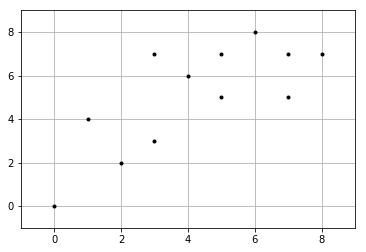

In [3]:
import numpy as np
X0 = np.array([7, 5, 7, 3, 4, 1, 0, 2, 8, 6, 5, 3])
X1 = np.array([5, 7, 7, 3, 6, 4, 0, 2, 7, 8, 5, 7])
plt.figure()
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0, X1, 'k.');

假设K-Means初始化时，将第一个类的重心设置在第5个样本，第二个类的重心设置在第11个样本.那么我们可以把每个实例与两个重心的距离都计算出来，将其分配到最近的类里面。计算结果如下表所示：  

|  样本  | X0 | X1 | 与C1距离 | 与C2距离 | 上次聚类结果 | 新聚类结果 | 是否改变 |
|:------:|:--:|:--:|:--------:|:--------:|:------------:|:----------:|:--------:|
|    1   |  7 |  5 |   3.16   |   2.00   |     None     |     C2     |    YES   |
|    2   |  5 |  7 |   1.41   |   2.00   |     None     |     C1     |    YES   |
|    3   |  7 |  7 |   3.16   |   2.83   |     None     |     C2     |    YES   |
|    4   |  3 |  3 |   3.16   |   2.83   |     None     |     C2     |    YES   |
|    5   |  4 |  6 |   0.00   |   1.41   |     None     |     C1     |    YES   |
|    6   |  1 |  4 |   3.61   |   4.12   |     None     |     C1     |    YES   |
|    7   |  0 |  0 |   7.21   |   7.07   |     None     |     C2     |    YES   |
|    8   |  2 |  2 |   4.47   |   4.24   |     None     |     C2     |    YES   |
|    9   |  8 |  7 |   4.12   |   3.61   |     None     |     C2     |    YES   |
|   10   |  6 |  8 |   2.83   |   3.16   |     None     |     C1     |    YES   |
|   11   |  5 |  5 |   1.41   |   0.00   |     None     |     C2     |    YES   |
|   12   |  3 |  7 |   1.41   |   2.83   |     None     |     C1     |    YES   |
| C1重心 |  4 |  6 |          |          |              |            |          |
| C2重心 |  5 |  5 |          |          |              |            |          |

新的重心位置和初始聚类结果如下图所示。第一类用X表示，第二类用点表示。重心位置用稍大的点突出显示。

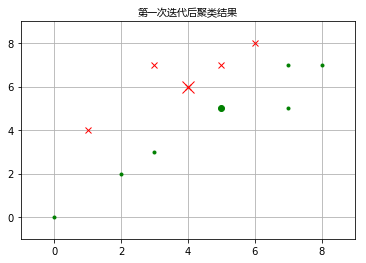

In [4]:
C1 = [1, 4, 5, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('第一次迭代后聚类结果',fontproperties=font)
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(4,6,'rx',ms=12.0)
plt.plot(5,5,'g.',ms=12.0);

现在我们重新计算两个类的重心，把重心移动到新位置，并重新计算各个样本与新重心的距离，并根据距离远近为样本重新归类。结果如下表所示：

|  样本  |  X0  |  X1  | 与C1距离 | 与C2距离 | 上次聚类结果 | 新聚类结果 | 是否改变 |
|:------:|:----:|:----:|:--------:|:--------:|:------------:|:----------:|:--------:|
|    1   |   7  |   5  |   3.49   |   2.58   |      C2      |     C2     |    NO    |
|    2   |   5  |   7  |   1.34   |   2.89   |      C1      |     C1     |    NO    |
|    3   |   7  |   7  |   3.26   |   3.75   |      C2      |     C1     |    YES   |
|    4   |   3  |   3  |   3.49   |   1.94   |      C2      |     C2     |    NO    |
|    5   |   4  |   6  |   0.45   |   1.94   |      C1      |     C1     |    NO    |
|    6   |   1  |   4  |   3.69   |   3.57   |      C1      |     C2     |    YES   |
|    7   |   0  |   0  |   7.44   |   6.17   |      C2      |     C2     |    NO    |
|    8   |   2  |   2  |   4.75   |   3.35   |      C2      |     C2     |    NO    |
|    9   |   8  |   7  |   4.24   |   4.46   |      C2      |     C1     |    YES   |
|   10   |   6  |   8  |   2.72   |   4.11   |      C1      |     C1     |    NO    |
|   11   |   5  |   5  |   1.84   |   0.96   |      C2      |     C2     |    NO    |
|   12   |   3  |   7  |   1.00   |   3.26   |      C1      |     C1     |    NO    |
| C1重心 | 3.80 | 6.40 |          |          |              |            |          |
| C2重心 | 4.57 | 4.14 |          |          |              |            |          |

画图结果如下：

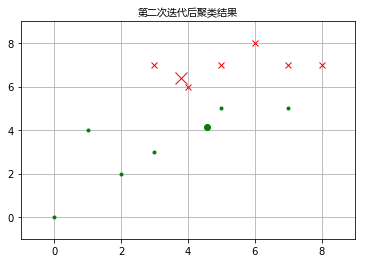

In [5]:
C1 = [1, 2, 4, 8, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('第二次迭代后聚类结果',fontproperties=font)
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(3.8,6.4,'rx',ms=12.0)
plt.plot(4.57,4.14,'g.',ms=12.0);

我们再重复一次上面的做法，把重心移动到新位置，并重新计算各个样本与新重心的距离，并根据距离远近为样本重新归类。结果如下表所示：

|  样本  |  X0  |  X1  | 与C1距离 | 与C2距离 | 上次聚类结果 | 新聚类结果 | 是否改变 |
|:------:|:----:|:----:|:--------:|:--------:|:------------:|:----------:|:--------:|
|    1   |   7  |   5  |   2.50   |   5.28   |      C1      |     C1     |    NO    |
|    2   |   5  |   7  |   0.50   |   5.05   |      C1      |     C1     |    NO    |
|    3   |   7  |   7  |   1.50   |   6.38   |      C1      |     C1     |    NO    |
|    4   |   3  |   3  |   4.72   |   0.82   |      C2      |     C2     |    NO    |
|    5   |   4  |   6  |   1.80   |   3.67   |      C1      |     C1     |    NO    |
|    6   |   1  |   4  |   5.41   |   1.70   |      C2      |     C2     |    NO    |
|    7   |   0  |   0  |   8.90   |   3.56   |      C2      |     C2     |    NO    |
|    8   |   2  |   2  |   6.10   |   0.82   |      C2      |     C2     |    NO    |
|    9   |   8  |   7  |   2.50   |   7.16   |      C1      |     C1     |    NO    |
|   10   |   6  |   8  |   1.12   |   6.44   |      C1      |     C1     |    NO    |
|   11   |   5  |   5  |   2.06   |   3.56   |      C2      |     C1     |    YES   |
|   12   |   3  |   7  |   2.50   |   4.28   |      C1      |     C1     |    NO    |
| C1重心 | 5.50 | 7.00 |          |          |              |            |          |
| C2重心 | 2.20 | 2.80 |          |          |              |            |          |

画图结果如下：

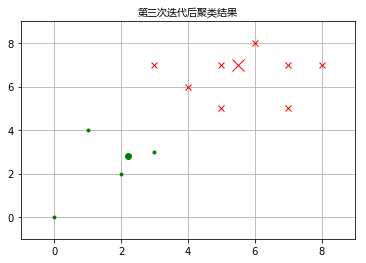

In [6]:
C1 = [0, 1, 2, 4, 8, 9, 10, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('第三次迭代后聚类结果',fontproperties=font)
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(5.5,7.0,'rx',ms=12.0)
plt.plot(2.2,2.8,'g.',ms=12.0);

再重复上面的方法就会发现类的重心不变了，K-Means会在条件满足的时候停止重复聚类过程。通常，条件是前后两次迭代的成本函数值的差达到了限定值，或者是前后两次迭代的重心位置变化达到了限定值。如果这些停止条件足够小，K-Means就能找到最优解。不过这个最优解不一定是全局最优解。

### 11.1.1 K-means clustering using scikit-learn

k均值算法非常容易实现，但与其他聚类算法相比，计算效率也非常高，这可能解释了它的流行程度。k均值算法属于基于原型聚类的范畴.在本章的后面，我们将讨论聚类的另外两种类型，即**分层聚类**和**基于密度的聚类**。   
基于原型的聚类意味着每个聚类都由一个原型表示，原型可以是具有连续特征的相似点的质心(平均值)，也可以是分类特征中的Medoid(最具代表性或最常见的点)。  
虽然k-均值很好地识别球形聚类，但是这种聚类算法的缺点之一是我们**必须事先指定簇数k**。对k进行不适当的选择会导致聚类性能较差。在本章的后面，我们将讨论**肘部法**和**缩略图**，它们是评估聚类质量的有用技术，可以帮助我们确定簇k的最佳数目。   
尽管k均值聚类可以应用于较高维度的数据，但为了实现可视化，我们将**使用简单的二维数据集完成以下示例** 

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, #150个随机的点
                  n_features=2, # 每个样本由两个特征组成
                  centers=3, #分为三个高密区
                  cluster_std=0.5, # 每个样本簇方差大小
                  shuffle=True, 
                  random_state=0)

我们刚刚创建的数据集由150个随机生成的点组成，这些点大致分为三个密度较高的区域，通过二维散点图将其可视化：

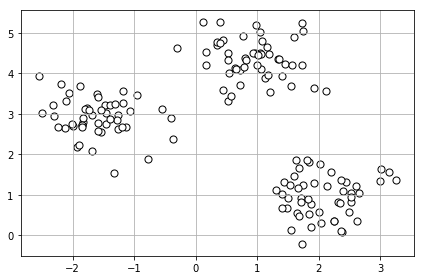

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

********
常用的距离度量标准是欧几里得距离的平方$$d(\mathbf{x},\mathbf{y})^2=\sum_{j=1}^{m}(x_j-y_j)^2=\left \| \mathbf{x}- \mathbf{y}\right \|_{2}^{2}$$
j是样本点x和y的第j个维度（特征列）。<br>
因此，k-means是一个简单的优化问题，通过迭代使得簇内误差平方和SSE(也称为cluster intertia)最小。$$SSE=\sum_{i=1}^{n}\sum_{j=1}^{k}\omega ^{(i,j)}=\left \| \mathbf{x}^{(i)}- \mathbf{\mu ^{(j)}}\right \|_{2}^2$$
其中，$\mu ^{(j)}$是簇j的中心点，如果样本$x^{(i)}$属于簇j，则有$\omega ^{(i,j)}=1$，否则$\omega ^{(i,j)}=0$


*******
使用scikit-learn的cluster模块中的k-means类将其应用到我们的样本数据集中：

In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, #设定簇数量
            init='random', #这里若取值为k-means++，则使用k-means++聚类算法
            n_init=10, #程序能够基于不同的随机初始中心点独立运行算法10次，并从中选择SSE最小的作为最终模型
            max_iter=300, #指定算法每轮运行的迭代次数
            tol=1e-04,  #如果算法不收敛，则使用tol值，此参数控制对簇内误差平方和的容忍程度，用于判定算法是否收敛
            random_state=0)

y_km = km.fit_predict(X)

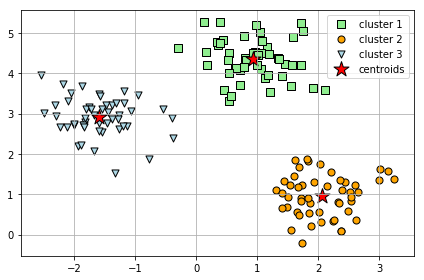

In [10]:
# 做可视化处理
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
# 簇中心保存在k-means对象的centers_属性中
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

在上面的散点图中，我们可以看到k-均值将三个质心放置在每个球体的中心，这看起来是一个合理的分组.  

## 11.1.2 k-means++

背景：上述经典的k-means使用随机点作为初始中心点，如初始中心点选择不当，有可能会导致簇效果不佳或产生收敛速度慢等问题。<br>
解决方案1：在数据集上多次运行k-menas算法，并根据误差平方和SSE选择性能最好的模型。<br>
解决方案2：K-means++：让初始中心点彼此尽可能远离。k-means++主要步骤如下：<br>
1 初始化一个空集合$\mathbf{M}$，用于存储选定的k个中心点。<br>
2 从输入样本中随机选定第一个中心点$\mu ^{(j)}$，并将其加入到集含$\mathbf{M}$中。<br>
3 对于集含$\mathbf{M}$之外的任意样本点$x^{(i)}$，通过计算找到与其平方距离最小的样本$d(x^{(i)},\mathbf{M})^2$。<br>
4 使用加权概率分布$\frac{d(\mathbf{\mu ^{(p)},\mathbf{M}})^2}{\sum_{j}d(\mathbf{x^{(i)},\mathbf{M}})^2}$来随机选择下一个中心点$\mu ^{(p)}$。
5 重复步骤2，3，直到选定k个中心点。<br>
6 基于选定的中心点执行k-means算法。<br>
<hr>
注：通过sklearn的KMeans对象来实现k-means++算法时，只需将init参数的值random替换为k-means++(默认值)即可。下面利用k-means++算法来实现上面三个簇的聚类。


In [11]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)
#scikit中的make_blobs方法常被用来生成聚类算法的测试数据
#直观地说，make_blobs会根据用户指定的特征数量、中心点数量、范围等来生成几类数据，这些数据可用于测试聚类算法的效果。

In [12]:
# 采用scikit-learn中的KMeans
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
#将簇的数量设定为3个。设置n_init=10，程序能够基于不同的随机初始中心独立运行算法10次，并从中选择SSE最小的作为最终模型。
#通过max_iter参数，指定算法每轮运行的迭代次数。
#tol=1e-04参数控制对簇内误差平方和的容忍度
#对于sklearn中的k-means算法，如果模型收敛了，即使未达到预定迭代次数，算法也会终止
#注意，将init='random'改为init='k-means++'（默认值）就由k-means算法变为k-means++算法了
y_km=km.fit_predict(x)

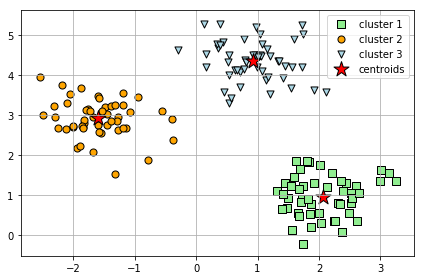

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x[y_km == 0, 0],x[y_km == 0, 1],s=50, c='lightgreen',marker='s', edgecolor='black',label='cluster 1')
plt.scatter(x[y_km == 1, 0],x[y_km == 1, 1],s=50, c='orange', marker='o', edgecolor='black',label='cluster 2')
plt.scatter(x[y_km == 2, 0],x[y_km == 2, 1],s=50, c='lightblue',marker='v', edgecolor='black',label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],s=250, marker='*',c='red', edgecolor='black',label='centroids')
#簇中心保存在KMeans对象的centers_属性中
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

k-means算法又分为**硬聚类**和**软聚类**。硬聚类指的是数据集中每个样本只能划分到一个簇（即上面用到的算法）。而软聚类，又称为模糊聚类算法可以将一个样本划分到一个或者多个簇。

******
以下示例讨论数据分布对k-means聚类的影响：

1
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.616436816839852 

2
Homogeneity： 0.9898828240244267
completeness： 0.9899006758819153
V measure： 0.9898917498726852
AMI： 0.9897991568445268
ARI： 0.9933165272203728
Silhouette： 0.6189656317733315 

3
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.5275987244664399 

4
Homogeneity： 0.7265509613434449
completeness： 0.727533553320898
V measure： 0.7270419253408104
AMI： 0.7242894892118523
ARI： 0.6732267498459052
Silhouette： 0.5349798539919979 

5
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.4790725752982868 

6
Homogeneity： 0.7449364376693913
completeness： 0.7755445167472194
V measure： 0.7599323988656884
AMI： 0.7428234768685047
ARI： 0.7113213508090338
Silhouette： 0.5737260449304202 

7
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.5975066093204152 

8
Homogeneity： 0.9776347312784609
completeness： 0.972863

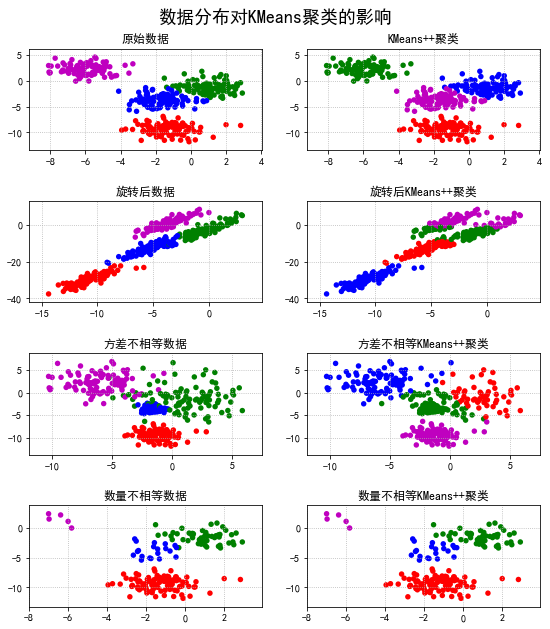

In [14]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score,\
    adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans


def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d


if __name__ == "__main__":
    N = 400    # 表明生成400个样本
    centers = 4    # 表明生成4个中心点（簇）
    data, y = ds.make_blobs(N, n_features=2, centers=centers, random_state=2)
    # cluster_std = (1,2.5,0.5,2)，表明对高斯分布的方差做个变换，默认情况下，方差都是1.
    data2, y2 = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=(1,2.5,0.5,2), random_state=2)
    
    # 以下代码，使得四个类别的样本不均衡
    # y == 0: 取全部；y == 1: 取50个; y == 2: 取20个; y ==3: 取5个 
    data3 = np.vstack((data[y == 0][:], data[y == 1][:50], data[y == 2][:20], data[y == 3][:5]))
    # 使得y3与data3数量一致
    y3 = np.array([0] * 100 + [1] * 50 + [2] * 20 + [3] * 5)
    # 对矩阵做乘法，本质上就是对矩阵做旋转
    m = np.array(((1, 1), (1, 3)))
    data_r = data.dot(m)

    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    cm = matplotlib.colors.ListedColormap(list('rgbm'))
    data_list = data, data, data_r, data_r, data2, data2, data3, data3
    y_list = y, y, y, y, y2, y2, y3, y3
    titles = '原始数据', 'KMeans++聚类', '旋转后数据', '旋转后KMeans++聚类',\
             '方差不相等数据', '方差不相等KMeans++聚类', '数量不相等数据', '数量不相等KMeans++聚类'

    # 生成KMeans的模型，init为初始样本的方法, n_init = 5: 做5次计算，从5次结果选择最好的结果输出，默认是10
    model = KMeans(n_clusters=4, init='k-means++', n_init=5)
    plt.figure(figsize=(8, 9), facecolor='w')
    for i, (x, y, title) in enumerate(zip(data_list, y_list, titles), start=1):
        plt.subplot(4, 2, i)
        plt.title(title)
        if i % 2 == 1:
            y_pred = y
        else:
            y_pred = model.fit_predict(x)   # 预测聚类
        print(i)
        # 衡量指标的方法在sklearn里面都已经内置了，只需要调用即可
        # 这些指标：取1是最优的，取0是最差的；当然轮廓系数理论上是达不到1的。
        print('Homogeneity：', homogeneity_score(y, y_pred))
        print('completeness：', completeness_score(y, y_pred))
        print('V measure：', v_measure_score(y, y_pred))
        print('AMI：', adjusted_mutual_info_score(y, y_pred))
        print('ARI：', adjusted_rand_score(y, y_pred))
        print('Silhouette：', silhouette_score(x, y_pred), '\n')
        
        # 样本x是二维数据，所以通过下面方法做散状图
        # 计算出来的y_pred为类别(c: classification)
        # cmap: 颜色的映射表: r:红，g:绿，b:蓝，m:品红
        plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=30, cmap=cm, edgecolors='none')
        x1_min, x2_min = np.min(x, axis=0)
        x1_max, x2_max = np.max(x, axis=0)
        x1_min, x1_max = expand(x1_min, x1_max)
        x2_min, x2_max = expand(x2_min, x2_max)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(b=True, ls=':')
    plt.tight_layout(2, rect=(0, 0, 1, 0.97))
    plt.suptitle('数据分布对KMeans聚类的影响', fontsize=18)
    plt.show()


输出为三维聚类图像：

1
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.6221326889834607 

2
Homogeneity： 0.9722027562066992
completeness： 0.9722202892162964
V measure： 0.9722115226324496
AMI： 0.9719728781258202
ARI： 0.9801510934032177
Silhouette： 0.6259717590818772 

3
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.35732052438420886 

4
Homogeneity： 0.6825970310598137
completeness： 0.6830900461226861
V measure： 0.682843449601665
AMI： 0.679972104420377
ARI： 0.6302684042112914
Silhouette： 0.5079803791894099 

5
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.45085107032497473 

6
Homogeneity： 0.7709340468175441
completeness： 0.7769408816169279
V measure： 0.7739258088619988
AMI： 0.7690392359182
ARI： 0.7778006438541208
Silhouette： 0.5091901258848686 

7
Homogeneity： 1.0
completeness： 1.0
V measure： 1.0
AMI： 1.0
ARI： 1.0
Silhouette： 0.6894079926190417 

8
Homogeneity： 0.9304059207655117
completeness： 0.7079502

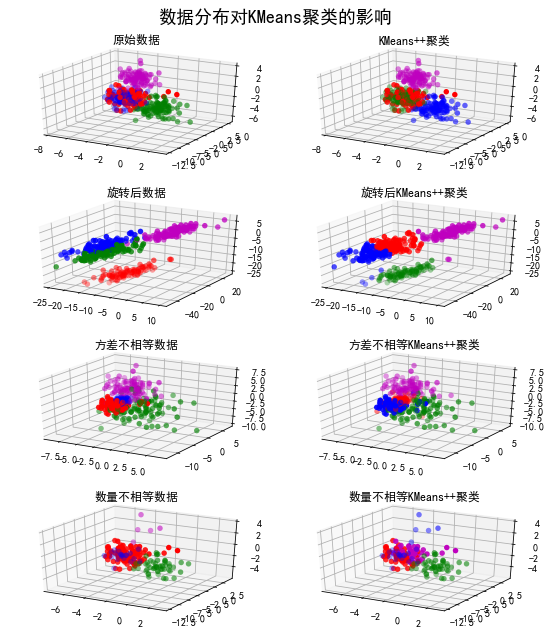

In [15]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score,\
    adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d


if __name__ == "__main__":
    N = 400
    centers = 4
    # data, y = ds.make_blobs(N, n_features=2, centers=centers, random_state=2)
    # data2, y2 = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=(1,2.5,0.5,2), random_state=2)
    data, y = ds.make_blobs(N, n_features=3, centers=centers, random_state=2)
    data2, y2 = ds.make_blobs(N, n_features=3, centers=centers, cluster_std=(1,2.5,0.5,2), random_state=2)
    data3 = np.vstack((data[y == 0][:], data[y == 1][:50], data[y == 2][:20], data[y == 3][:5]))
    y3 = np.array([0] * 100 + [1] * 50 + [2] * 20 + [3] * 5)
    # m = np.array(((1, 1), (1, 3)))
    # 对3x3的矩阵，乘上一个数据，就是对数据做一个旋转，平移，对称，错切的变换
    m = np.array(((1, 1, 1), (1, 3, 2), (3, 6, 1)))
    data_r = data.dot(m)

    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    cm = matplotlib.colors.ListedColormap(list('rgbm'))
    data_list = data, data, data_r, data_r, data2, data2, data3, data3
    y_list = y, y, y, y, y2, y2, y3, y3
    titles = '原始数据', 'KMeans++聚类', '旋转后数据', '旋转后KMeans++聚类',\
             '方差不相等数据', '方差不相等KMeans++聚类', '数量不相等数据', '数量不相等KMeans++聚类'

    model = KMeans(n_clusters=4, init='k-means++', n_init=5)
    # plt.figure(figsize=(8, 9), facecolor='w')
    fig = plt.figure(figsize=(8, 9), facecolor='w')
    for i, (x, y, title) in enumerate(zip(data_list, y_list, titles), start=1):
        # plt.subplot(4, 2, i)
        ax = fig.add_subplot(4, 2, i, projection='3d')
        plt.title(title)
        if i % 2 == 1:
            y_pred = y
        else:
            y_pred = model.fit_predict(x)
        print(i)
        print('Homogeneity：', homogeneity_score(y, y_pred))
        print('completeness：', completeness_score(y, y_pred))
        print('V measure：', v_measure_score(y, y_pred))
        print('AMI：', adjusted_mutual_info_score(y, y_pred))
        print('ARI：', adjusted_rand_score(y, y_pred))
        print('Silhouette：', silhouette_score(x, y_pred), '\n')
        # plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=30, cmap=cm, edgecolors='none')
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], s=30, c=y_pred, cmap=cm, edgecolors='none', depthshade=True)
        # x1_min, x2_min = np.min(x, axis=0)
        # x1_max, x2_max = np.max(x, axis=0)
        # x1_min, x1_max = expand(x1_min, x1_max)
        # x2_min, x2_max = expand(x2_min, x2_max)
        # plt.xlim((x1_min, x1_max))
        # plt.ylim((x2_min, x2_max))
        ax.grid(b=True, ls=':')
    plt.tight_layout(2, rect=(0, 0, 1, 0.97))
    plt.suptitle('数据分布对KMeans聚类的影响', fontsize=18)
    plt.show()

同一性Hommogeneity:$$h=\left\{\begin{matrix}
1 & if H(C)=0\\ 
1-\frac{H(C|K)}{H(C)} & otherwise
\end{matrix}\right.$$

完整性Completness:$$h=\left\{\begin{matrix}
1 & if H(K)=0\\ 
1-\frac{H(K|C)}{H(K)} & otherwise
\end{matrix}\right.$$

调和平均V-Measure:$$v_{\beta }=\frac{(1+\beta )\cdot h\cdot c}{\beta \cdot h+c}$$

调整互信息AMI：$$AMI=\frac{MI-E[MI]}{max(H(U),H(V))-E[MI]}$$

调整兰德系数ARI：$$ARI=\frac{RI-E[RI]}{max(RI)-E[RI]}$$

轮廓系数Sihouette:$$s=\frac{b-a}{max(a,b)}$$

### 11.1.3 Using the elbow method（肘方法） to find the optimal number of clusters 

背景：由于无监督学习没有数据集样本类标的确切信息，所以无法在无监督学习中使用前面章节提到的用来评估监督学习模型性能的相关技术。为了对聚类效果进行定量分析，我们需要使用模型内部的固有度量来比较不同k-means聚类结果的性能。例如簇内误差平方和（即聚类偏差）。在完成kmeans模型的拟合后，簇内误差平方和可以通过inertia属性来访问，因此，无需再次计算即可直接拿来使用。

在使用Scikit-Learning时不需要显式地计算集群内的SSE，因为在拟合kmeans模型之后，它已经可以通过惯性_属性访问： 

In [16]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


在簇内SSE的基础上，我们可以使用图形化的工具，即所谓的**肘形法**，来估计给定任务的最优簇k数。直觉上，我们可以说，如果k增加，失真会减少。这是因为样本将更接近他们被分配给的质心。肘形法的思想是确定k的值，在那里畸变开始以最快的速度增加，如果我们把k的不同值的失真绘制成图的话，就会变得更清晰：

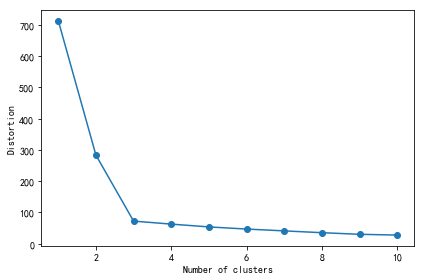

In [17]:
# 绘制不同k值对应的聚类偏差图
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

如上图所示，肘部位于k=3处，证明了k=3确实是这个数据集的好选择。

## 11.1.4 Quantifying the quality of clustering  via silhouette plots（轮廓图）

另一种评估聚类质量的定量分析方法是轮廓分析。此方法也可用于k-means之外的其他聚类方法。轮廓分析可以使用一个图形工具来度量簇中样本聚集的密集程度。通过如下三个步骤，可以计算数据集中单个样本的轮廓系数：
1. 将某一样本$x^{i}$与簇内其他点之间的平均距离看作是簇的内聚度$a^{i}$。
2. 将样本$x^{i}$与其他最近簇中所有点之间的平均距离看作是与下一最近簇的分离度$b^{i}$。
3. 将簇分离度与簇内聚度之差除以二者中的较大者得到轮廓系数$s^{i}$，如下式所示：
<div align="center">$$S^{(i)}=\frac{b^{(i)}-a^{(i)}}{max\left \{ b^{(i)},a^{(i)} \right \}}$$</div>
轮廓系数的值介于-1到1之间。从上述公式可见，若簇内聚度与分离度相等（$b^{i}=a^{i}$），则轮廓系数值为0.此外，由于$b^{i}$衡量样本与其他簇内样本间的差异程度，$a^{i}$表示样本与簇内其他样本的相似程度，因此，如果$b^{i}>>a^{i}$，我们可以得到一个值为1的理想的轮廓系数。

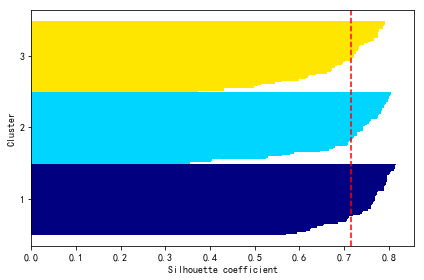

In [18]:
# 绘制k=3时k-means算法的轮廓系数图
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)
# 获取簇的标号
cluster_labels = np.unique(y_km)
# 获取簇的个数
n_clusters = cluster_labels.shape[0]
# 基于欧式距离计算轮廓系数
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')  # sihouette_samples计算获得metric
# 设置y坐标的起始位置
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]  # 获取不同簇的轮廓系数
    c_silhouette_vals.sort()    # 对簇中样本的轮廓系数由小到大进行排序
    y_ax_upper += len(c_silhouette_vals)    # 获取到簇中轮廓系数的个数
    color = cm.jet(float(i) / n_clusters)    # 获取不同颜色
    # 绘制水平直方图
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)
    # 获取显示y轴刻度的位置
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)    # 下一个y轴的起点位置
    
silhouette_avg = np.mean(silhouette_vals)    # 获取轮廓系数的平均值
plt.axvline(silhouette_avg, color="red", linestyle="--")    # 绘制一条平行y轴的轮廓系数平均值的虚线
# 显示y轴的刻度
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

为了展示聚类效果不佳的轮廓图的形状，使用两个中心点来初始化k-means算法

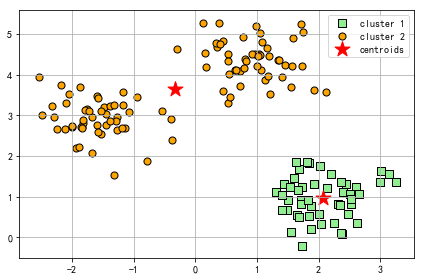

In [19]:
# 绘制k=2时k-means算法的轮廓系数图
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

# 画出聚类效果图
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_05.png', dpi=300)
plt.show()

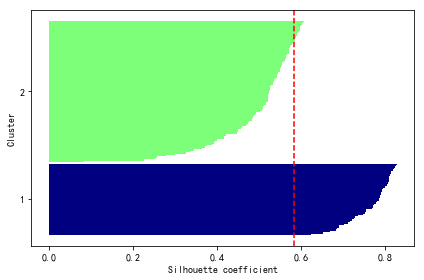

In [20]:
# 绘制轮廓图对聚类结果进行评估
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_06.png', dpi=300)
plt.show()

由结果图可以看出，轮廓具有明显不同的长度和宽度，因此该聚类非最优结果。

下面的例子运行四次K-Means，从一个数据集中分别创建2，3，4，8个类，然后分别计算它们的轮廓系数。

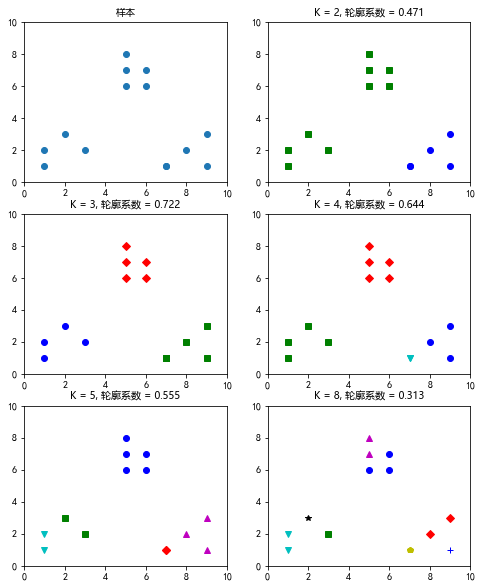

In [20]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
plt.figure(figsize=(8, 10))
plt.subplot(3, 2, 1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('样本',fontproperties=font)
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1
for t in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
        plt.xlim([0, 10])
        plt.ylim([0, 10])
        plt.title('K = %s, 轮廓系数 = %.03f' % (t, metrics.silhouette_score(X, kmeans_model.labels_,metric='euclidean')),fontproperties=font)

很显然，这个数据集包括三个类。在K=3的时候轮廓系数是最大的。在K=8的时候，每个类的样本不仅彼此很接近，而且与其他类的样本也非常接近，因此这时轮廓系数是最小的。

### 11.1.5 图向量化

图像量化（imagequantization）是一种**将图像中相似颜色替换成同样颜色**的有损压缩方法。图像量化会减少图像的存储空间，由于表示不同颜色的字节减少了。

下面的例子中，我们将用聚类方法从一张图片中找出包含图片大多数颜色的压缩颜色调色板（palette），然后我们用这个压缩颜色调色板重新生成图片。

通过**pip install mahotas**安装mahotas图像处理库

In [21]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import shuffle  # shuffle将序列的所有元素随机排序
import mahotas as mh

In [22]:
# 读入图片，将图片矩阵展开成一个行向量
original_img = np.array(mh.imread('.\\images\\sun.jpeg'), dtype=np.float64) / 255
original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width * height, depth))

In [23]:
#用K-Means算法在随机选择1000个颜色样本中建立64个类。每个类都可能是压缩调色板中的一种颜色。
image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [24]:
# 为原始图片的每个像素进行类的分配
cluster_assignments = estimator.predict(image_flattened)

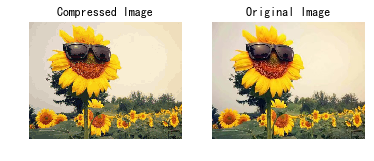

In [25]:
# 建立通过压缩调色板和类分配结果创建压缩后的图片
%matplotlib inline
import matplotlib.pyplot as plt
compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1
plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()

另一个图向量化的代码示例：

原始数据：
 [[0.87058824 0.53333333 0.48235294]
 [0.87843137 0.54117647 0.49019608]
 [0.89019608 0.54509804 0.49803922]
 ...
 [0.68235294 0.26666667 0.31372549]
 [0.70588235 0.2745098  0.31764706]
 [0.74117647 0.30588235 0.34117647]]
(158,)


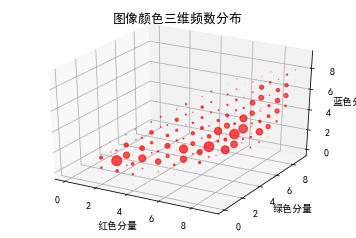

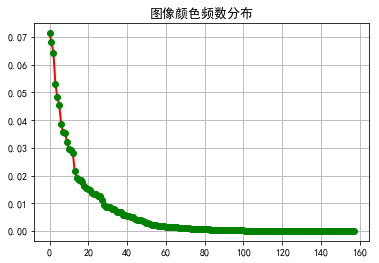

聚类结果：
 [28  8 47 ... 49 49 29]
聚类中心：
 [[0.92522876 0.64078431 0.48705882]
 [0.6122549  0.31029412 0.3620098 ]
 [0.3869281  0.10196078 0.24551396]
 [0.85173941 0.42024035 0.38039216]
 [0.64989858 0.23813387 0.29668695]
 [0.8664488  0.73769063 0.69063181]
 [0.77420021 0.40639835 0.4377709 ]
 [0.65176471 0.43843137 0.58039216]
 [0.83147575 0.5495356  0.50216718]
 [0.39487179 0.1653092  0.35656109]
 [0.90078431 0.51941176 0.42372549]
 [0.94670232 0.80231729 0.62210339]
 [0.72530345 0.29131653 0.31577965]
 [0.53501401 0.16563959 0.25901027]
 [0.33597811 0.07779298 0.24797082]
 [0.77885763 0.34015345 0.33827792]
 [0.86412918 0.69688581 0.63944637]
 [0.96715686 0.82941176 0.69019608]
 [0.47679739 0.25228758 0.44183007]
 [0.86759546 0.44509804 0.41609907]
 [0.76372549 0.6372549  0.61813725]
 [0.95490196 0.74733894 0.54341737]
 [0.53960784 0.31647059 0.50941176]
 [0.44944587 0.14748508 0.27331628]
 [0.7959695  0.52331155 0.48442266]
 [0.59421102 0.19794585 0.26349206]
 [0.67647059 0.36732026 0.

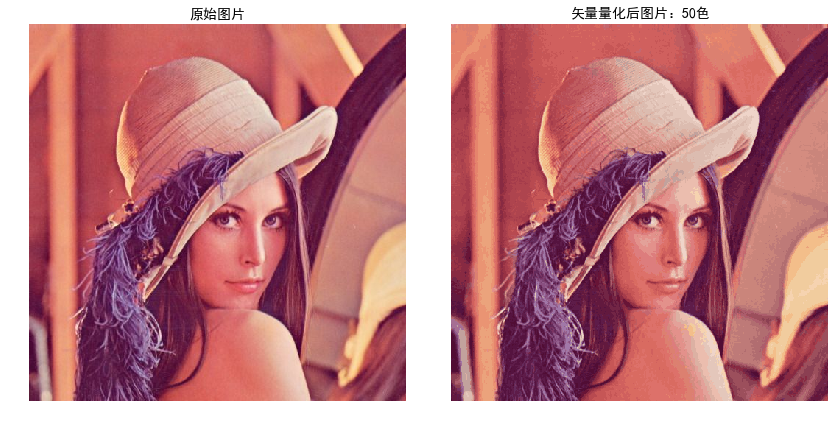

In [26]:
# !/usr/bin/python
# -*- coding: utf-8 -*-

from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def restore_image(cb, cluster, shape):
    row, col, dummy = shape
    image = np.empty((row, col, 3))
    index = 0
    for r in range(row):
        for c in range(col):
            image[r, c] = cb[cluster[index]]
            index += 1
    return image


def show_scatter(a):
    N = 10
    print('原始数据：\n', a)
    density, edges = np.histogramdd(a, bins=[N,N,N], range=[(0,1), (0,1), (0,1)])
    density /= density.sum()
    x = y = z = np.arange(N)
    d = np.meshgrid(x, y, z)

    fig = plt.figure(1, facecolor='w')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(d[1], d[0], d[2], c='r', s=100*density/density.max(), marker='o', depthshade=True)
    ax.set_xlabel('红色分量')
    ax.set_ylabel('绿色分量')
    ax.set_zlabel('蓝色分量')
    plt.title('图像颜色三维频数分布', fontsize=13)

    plt.figure(2, facecolor='w')
    den = density[density > 0]
    print(den.shape)
    den = np.sort(den)[::-1]
    t = np.arange(len(den))
    plt.plot(t, den, 'r-', t, den, 'go', lw=2)
    plt.title('图像颜色频数分布', fontsize=13)
    plt.grid(True)

    plt.show()


if __name__ == '__main__':
    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False

    num_vq = 50
    im = Image.open('.\\images\\lena.png')     # son.bmp(100)/flower2.png(200)/son.png(60)/lena.png(50)
    image = np.array(im).astype(np.float) / 255
    image = image[:, :, :3]
    image_v = image.reshape((-1, 3))
    show_scatter(image_v)

    N = image_v.shape[0]    # 图像像素总数
    # 选择足够多的样本(如1000个)，计算聚类中心
    idx = np.random.randint(0, N, size=1000)
    image_sample = image_v[idx]
    model = KMeans(num_vq)
    model.fit(image_sample)
    c = model.predict(image_v)  # 聚类结果
    print('聚类结果：\n', c)
    print('聚类中心：\n', model.cluster_centers_)

    plt.figure(figsize=(12, 6), facecolor='w')
    plt.subplot(121)
    plt.axis('off')
    plt.title('原始图片', fontsize=14)
    plt.imshow(image)
    # plt.savefig('1.png')

    plt.subplot(122)
    vq_image = restore_image(model.cluster_centers_, c, image.shape)
    plt.axis('off')
    plt.title('矢量量化后图片：%d色' % num_vq, fontsize=14)
    plt.imshow(vq_image)
    # plt.savefig('2.png')

    plt.tight_layout(2)
    plt.show()


### 11.1.6 通过聚类学习特征

本小节将聚类和分类组合起来研究一个半监督学习问题。我们将对不带标签的数据进行聚类，获得一些特征，然后用这些特征来建立一个监督方法分类器。

在下面的例子中，我们将用聚类算法处理这些描述器来学习图片的特征。每个元素将被编码成从图片中抽取的，被分配到同一个类的描述器的数量。这种方法有时也称为**视觉词袋（bag-offeatures）表示法**，由于这个类的集合与词袋模型里的词汇表类似。  
。我们将使用Kaggle's Dogs vs.Cats competition [数据集](https://www.kaggle.com/c/dogs-vs-cats/data)里面的1000张猫图片和1000张狗图片数据。注意，图片有不同的尺寸；由于我们的特征向量不用像素表示，所有我们也不需要将所有图片都缩放成同样的尺寸。我们将训练其中60的图片，然后用剩下的40图片来测试：

In [27]:
import numpy as np
import mahotas as mh
from mahotas.features import surf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.cluster import MiniBatchKMeans
import glob

首先，我们加载图片，转换成灰度图，再抽取SURF描述器。SURF描述器与其他类似的特征相比，可以更快的被提取，但是从2000张图片中抽取描述器依然是很费时间的。

In [28]:
all_instance_filenames = []
all_instance_targets = []
for f in glob.glob('.\\ceshi\\*.jpg'):
    target = 1 if 'cat' in f else 0
    all_instance_filenames.append(f)
    all_instance_targets.append(target)
surf_features = []
counter = 0
for f in all_instance_filenames:
    print('Reading image:', f)
    image = mh.imread(f, as_grey=True)
    surf_features.append(surf.surf(image)[:, 5:])
train_len = int(len(all_instance_filenames) * .60)
X_train_surf_features = np.concatenate(surf_features[:train_len])
X_test_surf_feautres = np.concatenate(surf_features[train_len:])
y_train = all_instance_targets[:train_len]
y_test = all_instance_targets[train_len:]

Reading image: .\ceshi\cat.0.jpg
Reading image: .\ceshi\cat.1.jpg
Reading image: .\ceshi\cat.100.jpg
Reading image: .\ceshi\cat.101.jpg
Reading image: .\ceshi\cat.102.jpg
Reading image: .\ceshi\cat.103.jpg
Reading image: .\ceshi\cat.104.jpg
Reading image: .\ceshi\cat.108.jpg
Reading image: .\ceshi\cat.109.jpg
Reading image: .\ceshi\cat.110.jpg
Reading image: .\ceshi\cat.111.jpg
Reading image: .\ceshi\cat.112.jpg
Reading image: .\ceshi\cat.113.jpg
Reading image: .\ceshi\cat.114.jpg
Reading image: .\ceshi\cat.115.jpg
Reading image: .\ceshi\cat.116.jpg
Reading image: .\ceshi\cat.12.jpg
Reading image: .\ceshi\cat.120.jpg
Reading image: .\ceshi\cat.121.jpg
Reading image: .\ceshi\cat.122.jpg
Reading image: .\ceshi\cat.123.jpg
Reading image: .\ceshi\cat.124.jpg
Reading image: .\ceshi\cat.125.jpg
Reading image: .\ceshi\cat.126.jpg
Reading image: .\ceshi\cat.127.jpg
Reading image: .\ceshi\cat.128.jpg
Reading image: .\ceshi\cat.13.jpg
Reading image: .\ceshi\cat.132.jpg
Reading image: .\ceshi\cat

Reading image: .\ceshi\dog.11999.jpg
Reading image: .\ceshi\dog.12000.jpg
Reading image: .\ceshi\dog.12001.jpg
Reading image: .\ceshi\dog.12002.jpg
Reading image: .\ceshi\dog.12003.jpg
Reading image: .\ceshi\dog.12004.jpg
Reading image: .\ceshi\dog.12005.jpg
Reading image: .\ceshi\dog.12006.jpg
Reading image: .\ceshi\dog.12007.jpg
Reading image: .\ceshi\dog.12008.jpg
Reading image: .\ceshi\dog.12009.jpg
Reading image: .\ceshi\dog.12010.jpg
Reading image: .\ceshi\dog.12011.jpg
Reading image: .\ceshi\dog.12012.jpg
Reading image: .\ceshi\dog.12013.jpg
Reading image: .\ceshi\dog.12014.jpg
Reading image: .\ceshi\dog.12015.jpg
Reading image: .\ceshi\dog.12016.jpg
Reading image: .\ceshi\dog.12017.jpg
Reading image: .\ceshi\dog.12018.jpg
Reading image: .\ceshi\dog.12019.jpg
Reading image: .\ceshi\dog.12020.jpg
Reading image: .\ceshi\dog.12021.jpg
Reading image: .\ceshi\dog.12022.jpg
Reading image: .\ceshi\dog.12023.jpg
Reading image: .\ceshi\dog.12024.jpg
Reading image: .\ceshi\dog.12025.jpg
R

然后我们把抽取的描述器分成300个类。用MiniBatchKMeans类实现，它是K-Means算法的变种，
每次迭代都随机抽取样本。由于每次迭代它只计算这些被随机抽取的一小部分样本与重心的距离，因
此MiniBatchKMeans可以更快的聚类，但是它的畸变程度会更大。实际上，计算结果差不多：

In [29]:
n_clusters = 300
print('Clustering', len(X_train_surf_features), 'features')
estimator = MiniBatchKMeans(n_clusters=n_clusters)
estimator.fit_transform(X_train_surf_features)

Clustering 131598 features


array([[1.25804   , 2.41919368, 2.42665988, ..., 1.25168244, 1.98329392,
        1.6436036 ],
       [1.26004885, 2.39593185, 2.40199051, ..., 1.2417376 , 1.94273925,
        1.62750209],
       [1.95197094, 1.71733264, 3.08668707, ..., 1.03461242, 1.32608778,
        1.17253929],
       ...,
       [1.68423833, 1.99542291, 2.7379649 , ..., 1.23063813, 1.55038182,
        1.39687744],
       [1.5234977 , 2.1344836 , 2.62165902, ..., 1.2324133 , 1.69871083,
        1.46163847],
       [1.54046715, 4.80849412, 0.8138707 , ..., 3.36198548, 4.29385588,
        3.84062182]])

之后我们为训练集和测试集构建特征向量。我们找出每一个SURF描述器的类，用Numpy的binCount()进行计数。下面的代码为每个样本生成一个300维的特征向量：

In [30]:
X_train = []
max = len(all_instance_filenames)
y_train = []
n_clusters=300
for i in range(0,train_len):
    instance = surf_features[i]
    haha = all_instance_targets[i]
    clusters = estimator.predict(instance)
    features = np.bincount(clusters)
    if features.size < n_clusters:
        features = np.append(features, np.zeros((1, n_clusters-features.size )))
        X_train.append(features)
        y_train.append(haha)
X_test = []
y_test = []
for i in range(train_len,max):
    
    instance = surf_features[i]
    print(instance.shape)
    xixi = all_instance_targets[i]
    clusters = estimator.predict(instance)
    features = np.bincount(clusters)
    if features.size < n_clusters:
        features = np.append(features, np.zeros((1, n_clusters-features.size )))
        X_test.append(features)
        y_test.append(xixi)

(870, 65)
(853, 65)
(667, 65)
(850, 65)
(580, 65)
(553, 65)
(709, 65)
(861, 65)
(350, 65)
(10, 65)
(848, 65)
(839, 65)
(52, 65)
(842, 65)
(795, 65)
(776, 65)
(780, 65)
(819, 65)
(787, 65)
(821, 65)
(909, 65)
(616, 65)
(59, 65)
(443, 65)
(842, 65)
(849, 65)
(505, 65)
(666, 65)
(427, 65)
(771, 65)
(687, 65)
(454, 65)
(918, 65)
(676, 65)
(858, 65)
(842, 65)
(814, 65)
(698, 65)
(600, 65)
(262, 65)
(906, 65)
(920, 65)
(814, 65)
(836, 65)
(904, 65)
(867, 65)
(913, 65)
(665, 65)
(847, 65)
(829, 65)
(397, 65)
(740, 65)
(876, 65)
(894, 65)
(493, 65)
(785, 65)
(847, 65)
(476, 65)
(446, 65)
(478, 65)
(806, 65)
(484, 65)
(832, 65)
(318, 65)
(22, 65)
(626, 65)
(841, 65)
(878, 65)
(891, 65)
(53, 65)
(870, 65)
(859, 65)
(897, 65)
(564, 65)
(870, 65)
(850, 65)
(846, 65)
(765, 65)
(829, 65)
(835, 65)
(852, 65)
(835, 65)
(552, 65)
(67, 65)
(872, 65)
(861, 65)
(901, 65)
(837, 65)
(849, 65)
(815, 65)
(824, 65)
(874, 65)
(384, 65)
(854, 65)
(885, 65)
(848, 65)
(847, 65)
(232, 65)
(838, 65)
(398, 65)
(815, 

最后，我们在特征向量和目标上训练一个逻辑回归分类器，然后估计它的精确率，召回率和准确率：

In [31]:
clf = LogisticRegression(C=0.001, penalty='l2')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      0.03      0.06        34
          1       0.00      0.00      0.00         0

avg / total       1.00      0.03      0.06        34

Precision:  0.0
Recall:  0.0
Accuracy:  0.029411764705882353


C:\Users\15525\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\15525\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


<font color=red>**K-means算法总结：**</font>  
**优点：**  
- 是解决聚类问题的一种经典算法，简单、快速
- 对处理大数据集，该算法保持可伸缩性和高效率
- 当簇近似为高斯分布时，它的效果较好  

**缺点：**
- 在簇的平均值可被定义的情况下才能使用，可能不适用于某些应用
- 必须事先给出k(要生成的簇的数目)，而且对初值敏感，对于不同的初始值，可能会导致不同结果。
- 不适合于发现非凸形状的簇或者大小差别很大的簇
- 对躁声和孤立点数据敏感  

可作为其他聚类方法的基础算法，如谱聚类.

## 11.2 Organizing clusters as a hierarchical tree  层次聚类

层次聚类（hierarchical clustering）算法的一个优势在于：它能够使我们绘制出树状图（基于二叉层次聚类的可视化），这有助于我们使用有意义的分类法解释聚类结果。层次聚类的另一优势在于我们无需事先指定簇的数量。  

层次聚类可以在不同层上对数据集进行划分，形成树状的聚类结构。  

层次聚类有两种主要方法：<font color=red>凝聚层次聚类(AGNES算法)</font>和<font color=red>分裂层次聚类(DIANA算法)</font>。在**分裂层次聚类**中，首先将所有的对象初始化到一个簇中，然后根据一些原则(比如最大的欧式距离)，将该簇分类。直到到达用户指定的簇数目或者两个簇之间的距离超过了某个阈值。然而**凝聚层次聚类**则是与分裂层次聚类相反，初将每个对象作为一个簇，然后这些簇根据某些准则被一步步地合并。两个簇间的距离由这两个不同簇中距离最近的数据点对的相似度来确定；聚类的合并过程反复进行直到所有的对象最终满足簇数目。

在凝聚层次聚类中，判定簇间距离的两个标准方法分别是单连接和全连接。可以使用单连接方法计算每一对簇中最相似两个样本的距离，并合并距离最近的两个样本所属的簇。与之相反，全连接的方法是通过比较找到分布于两个簇中最不相似的样本（距离最远的样本）进而完成簇的合并。如下图所示：

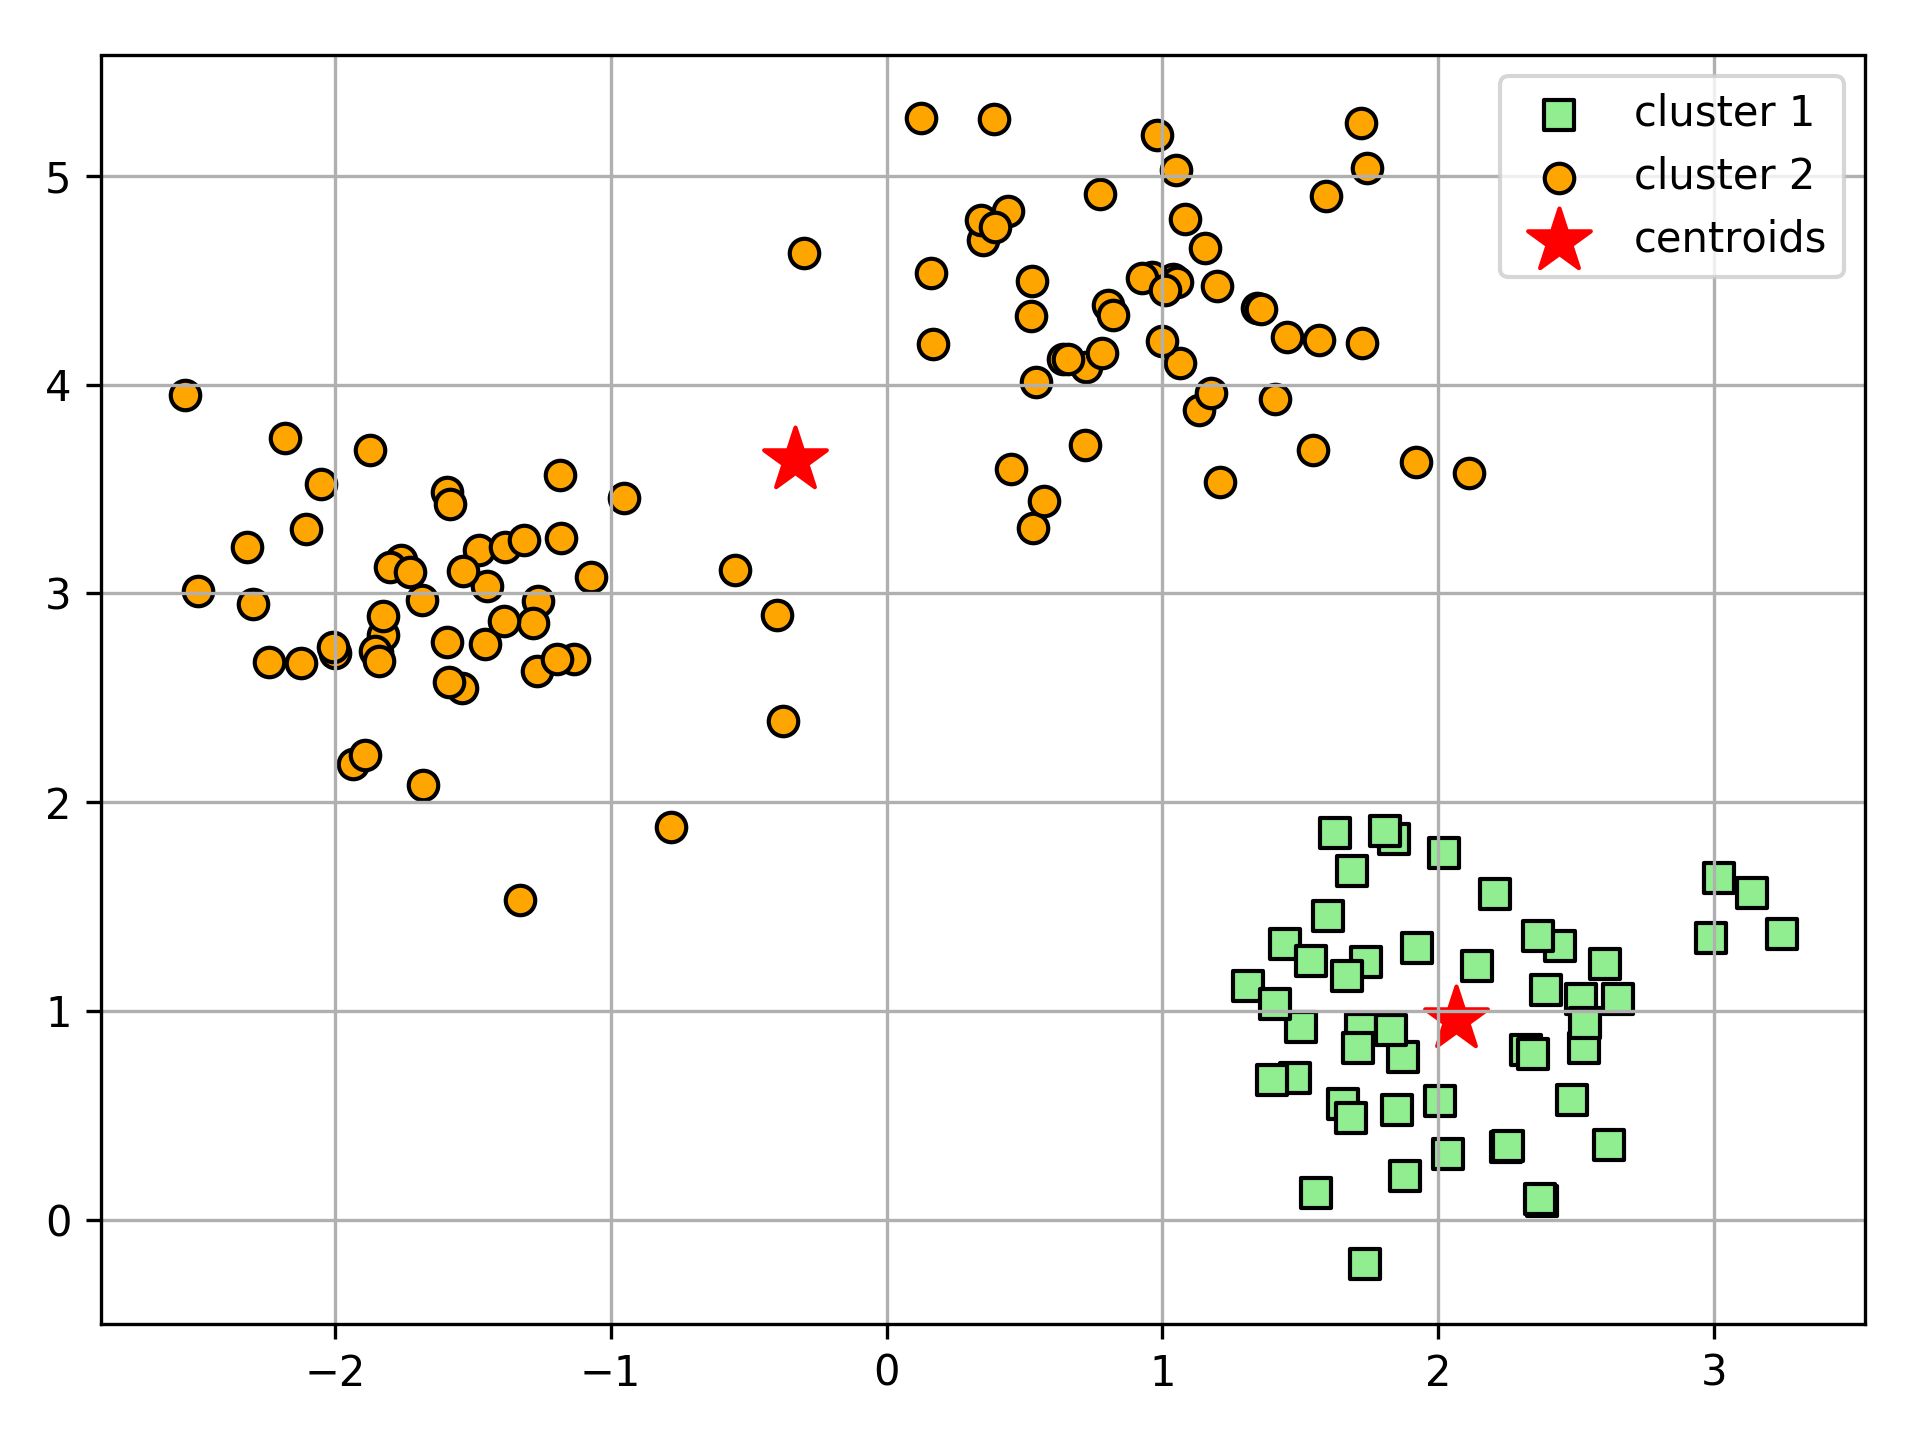

In [32]:
from IPython.display import Image
Image(filename='./images/11_05.png', width=400)

基于全连接方法的凝聚层次聚类的迭代过程如下：
1. 计算得到所有样本间的距离矩阵。
2. 将每个数据点看作是一个单独的簇。
3. 基于最不相似（距离最远）样本的距离，合并两个最接近的簇。
4. 更新相似矩阵（样本间距离矩阵）。
5. 重复步骤2到4，直到所有样本都合并到一个簇为止。

 获取样本：

首先，生成一些要处理的随机样本数据：行表示不同的观测值(ID_0-ID_4)，列是这些样本的不同特征(X、Y、Z)： 

In [33]:
# 先随机生成一些样本用于计算
import pandas as pd
import numpy as np

np.random.seed(123)
# seed()用于指定随机数生成时所用算法开始的整数值
# 如果使用相同的seed()值，则每次生成的随机数都相同，如果不设置这个值，则系统根据时间来自己选择这个值，此时每次生成的随机数因时间差异而不同

variables = ['X', 'Y', 'Z']    # 列表样本的不同特征
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']    # 5个不同的样本

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
# DataFrame是Pandas中的一个表结构的数据结构，包括三部分信息，表头（列的名称），表的内容（二维矩阵），索引（每行一个唯一的标记）
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### 11.2.1 Performing hierarchical clustering on a distance matrix（距离矩阵）

基于距离矩阵进行层次聚类：  

通过SciPy来计算距离矩阵，计算每个样本间两两的欧式距离，将矩阵矩阵用一个DataFrame进行保存，方便查看

In [34]:
# 使用Scipy中的子模块spatial.distance中的pdist函数来计算距离矩阵
from scipy.spatial.distance import pdist, squareform
# pdist观测值（n维）两两之间的距离。距离值越大，相关度越小
# squareform将向量形式的距离表示转换成dense矩阵形式

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
# 基于样本的特征X,Y,Z使用欧几里得距离计算了样本间的两两距离
# 通过将pdist函数的返回值输入到squareform函数中，获得一个记录成对样本间距离的对称矩阵
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


We can either pass a condensed distance matrix (upper triangular) from the `pdist` function, or we can pass the "original" data array and define the `metric='euclidean'` argument in `linkage`. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

使用cluster.hierarchy子模块下的linkage函数。此函数以全连接作为距离判定标准，它能够返回一个关联矩阵
from scipy.cluster.hierarchy import linkage

分析聚类结果：

In [35]:
# 1. incorrect approach: Squareform distance matrix使用通过squareform函数得到的距离矩阵

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

C:\Users\15525\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [36]:
# 2. correct approach: Condensed distance matrix  使用稠密距离矩阵

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
# 进一步分析聚类结果
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [37]:
# 3. correct approach: Input sample   以矩阵格式的实例数据作为输入

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


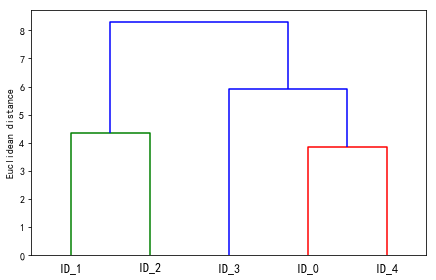

In [38]:
# 采用树状图的形式对聚类结果进行可视化展示
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

此树状图描述了采用凝聚层次聚类合并生成不同簇的过程。首先是ID0和ID4合并，接下来是ID1和ID2合并。

### 11.2.2 Attaching dendrograms to a heat map（树状图与热度图的关联）

在实际应用中，分层聚类树状图常与热图相结合，使我们能够用颜色码来表示样本矩阵中的单个值。在本节中，我们将讨论如何将树状图附加到热图上，并相应地排列热图中的行。  


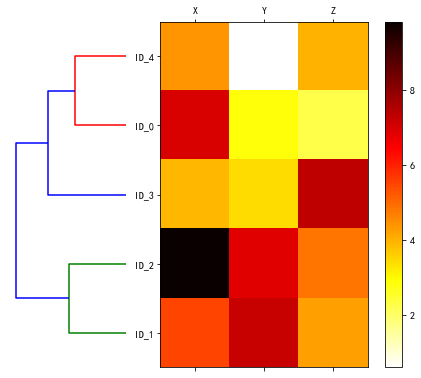

In [39]:
# 创建一个figure对象
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])  # 设置x轴的位置、y轴位置、树状图的宽度、树状图的高度

# 将树状图旋转90度
row_dendr = dendrogram(row_clusters, orientation='left')

# 根据树状图的簇标重排初始化数据框
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# 绘制热力图
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
# 设置热力图x轴和y轴标记
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('images/11_12.png', dpi=300)
plt.show()

如图所示，热图中的行的顺序反映了样本在树状图中的聚类。除了一个简单的树状图，每个样本的颜色编码值和热图中的特征为我们提供了一个很好的数据集摘要。   
通过热力图与树状图结合，能够更加直观的发现特征对于簇划分的影响，不同颜色代表欧式距离的大小。

### 11.2.3 Applying agglomerative clustering via scikitlearn使用sklearn实现凝聚聚类

采用sklearn中的AgglomerativeClustering类进行基于凝聚的层次聚类。

In [40]:
# 基于凝聚的层次聚类
from sklearn.cluster import AgglomerativeClustering
# n_clusters:设置簇的个数
# linkage:设置判定标准
ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [41]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


不同合并策略下的层次聚类代码实例：

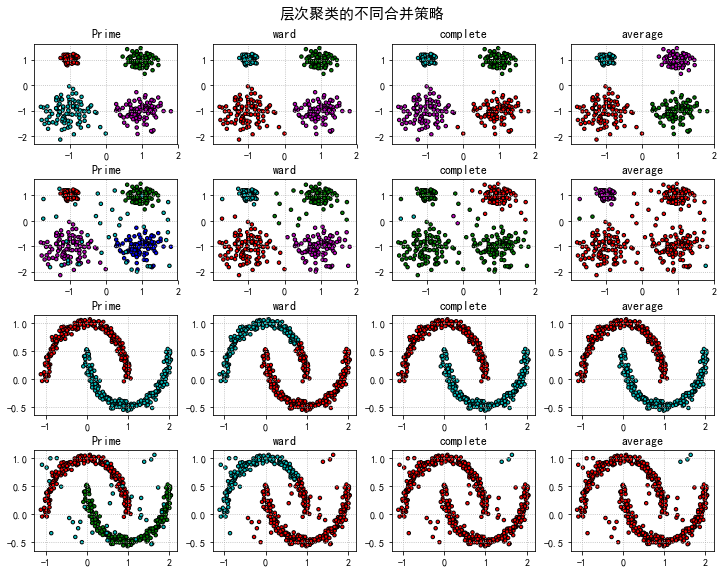

In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import sklearn.datasets as ds
import warnings


def extend(a, b):
    return 1.05*a-0.05*b, 1.05*b-0.05*a


if __name__ == '__main__':
    warnings.filterwarnings(action='ignore', category=UserWarning)
    np.set_printoptions(suppress=True)
    np.random.seed(0)
    n_clusters = 4
    N = 400
    data1, y1 = ds.make_blobs(n_samples=N, n_features=2, centers=((-1, 1), (1, 1), (1, -1), (-1, -1)),
                              cluster_std=(0.1, 0.2, 0.3, 0.4), random_state=0)
    data1 = np.array(data1)
    n_noise = int(0.1*N)
    r = np.random.rand(n_noise, 2)
    data_min1, data_min2 = np.min(data1, axis=0)
    data_max1, data_max2 = np.max(data1, axis=0)
    r[:, 0] = r[:, 0] * (data_max1-data_min1) + data_min1
    r[:, 1] = r[:, 1] * (data_max2-data_min2) + data_min2
    data1_noise = np.concatenate((data1, r), axis=0)
    y1_noise = np.concatenate((y1, [4]*n_noise))

    data2, y2 = ds.make_moons(n_samples=N, noise=.05)
    data2 = np.array(data2)
    n_noise = int(0.1 * N)
    r = np.random.rand(n_noise, 2)
    data_min1, data_min2 = np.min(data2, axis=0)
    data_max1, data_max2 = np.max(data2, axis=0)
    r[:, 0] = r[:, 0] * (data_max1 - data_min1) + data_min1
    r[:, 1] = r[:, 1] * (data_max2 - data_min2) + data_min2
    data2_noise = np.concatenate((data2, r), axis=0)
    y2_noise = np.concatenate((y2, [3] * n_noise))

    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False

    cm = mpl.colors.ListedColormap(['r', 'g', 'b', 'm', 'c'])
    plt.figure(figsize=(10, 8), facecolor='w')
    plt.cla()
    linkages = ("ward", "complete", "average")
    for index, (n_clusters, data, y) in enumerate(((4, data1, y1), (4, data1_noise, y1_noise),
                                                   (2, data2, y2), (2, data2_noise, y2_noise))):
        plt.subplot(4, 4, 4*index+1)
        plt.scatter(data[:, 0], data[:, 1], c=y, s=12, edgecolors='k', cmap=cm)
        plt.title('Prime', fontsize=12)
        plt.grid(b=True, ls=':')
        data_min1, data_min2 = np.min(data, axis=0)
        data_max1, data_max2 = np.max(data, axis=0)
        plt.xlim(extend(data_min1, data_max1))
        plt.ylim(extend(data_min2, data_max2))

        connectivity = kneighbors_graph(data, n_neighbors=7, mode='distance', metric='minkowski', p=2, include_self=True)
        connectivity = 0.5 * (connectivity + connectivity.T)
        for i, linkage in enumerate(linkages):
            ac = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',
                                         connectivity=connectivity, linkage=linkage)
            ac.fit(data)
            y = ac.labels_
            plt.subplot(4, 4, i+2+4*index)
            plt.scatter(data[:, 0], data[:, 1], c=y, s=12, edgecolors='k', cmap=cm)
            plt.title(linkage, fontsize=12)
            plt.grid(b=True, ls=':')
            plt.xlim(extend(data_min1, data_max1))
            plt.ylim(extend(data_min2, data_max2))
    plt.suptitle('层次聚类的不同合并策略', fontsize=15)
    plt.tight_layout(0.5, rect=(0, 0, 1, 0.95))
    plt.show()


## 11.3 密度聚类

密度聚类假设聚类结构能够通过样本分布的紧密程度来确定。   
密度聚类方法的指导思想是，只要样本点的密度大于某阈值，则将该样本添加到最近的簇中。  
这类算法能克服基于距离的算法只能发现“类圆
形”(凸)的聚类的缺点，可发现任意形状的聚类，且
对噪声数据不敏感。但计算密度单元的计算复杂度
大，需要建立空间索引来降低计算量。

### 11.3.1 Locating regions of high density（划分高密度区域） via DBSCAN  密度聚类

基于密度空间的聚类算法（density based spatial clustering of application with noise，DBSCAN）。与k-means算法不同，DBSCAN的簇空间不一定是球状的。此外，不同于k-means和层次聚类，DBSCAN可以识别并移除噪声点，因此它不一定会将所有的样本点都划分都某一簇中。如下图所示：

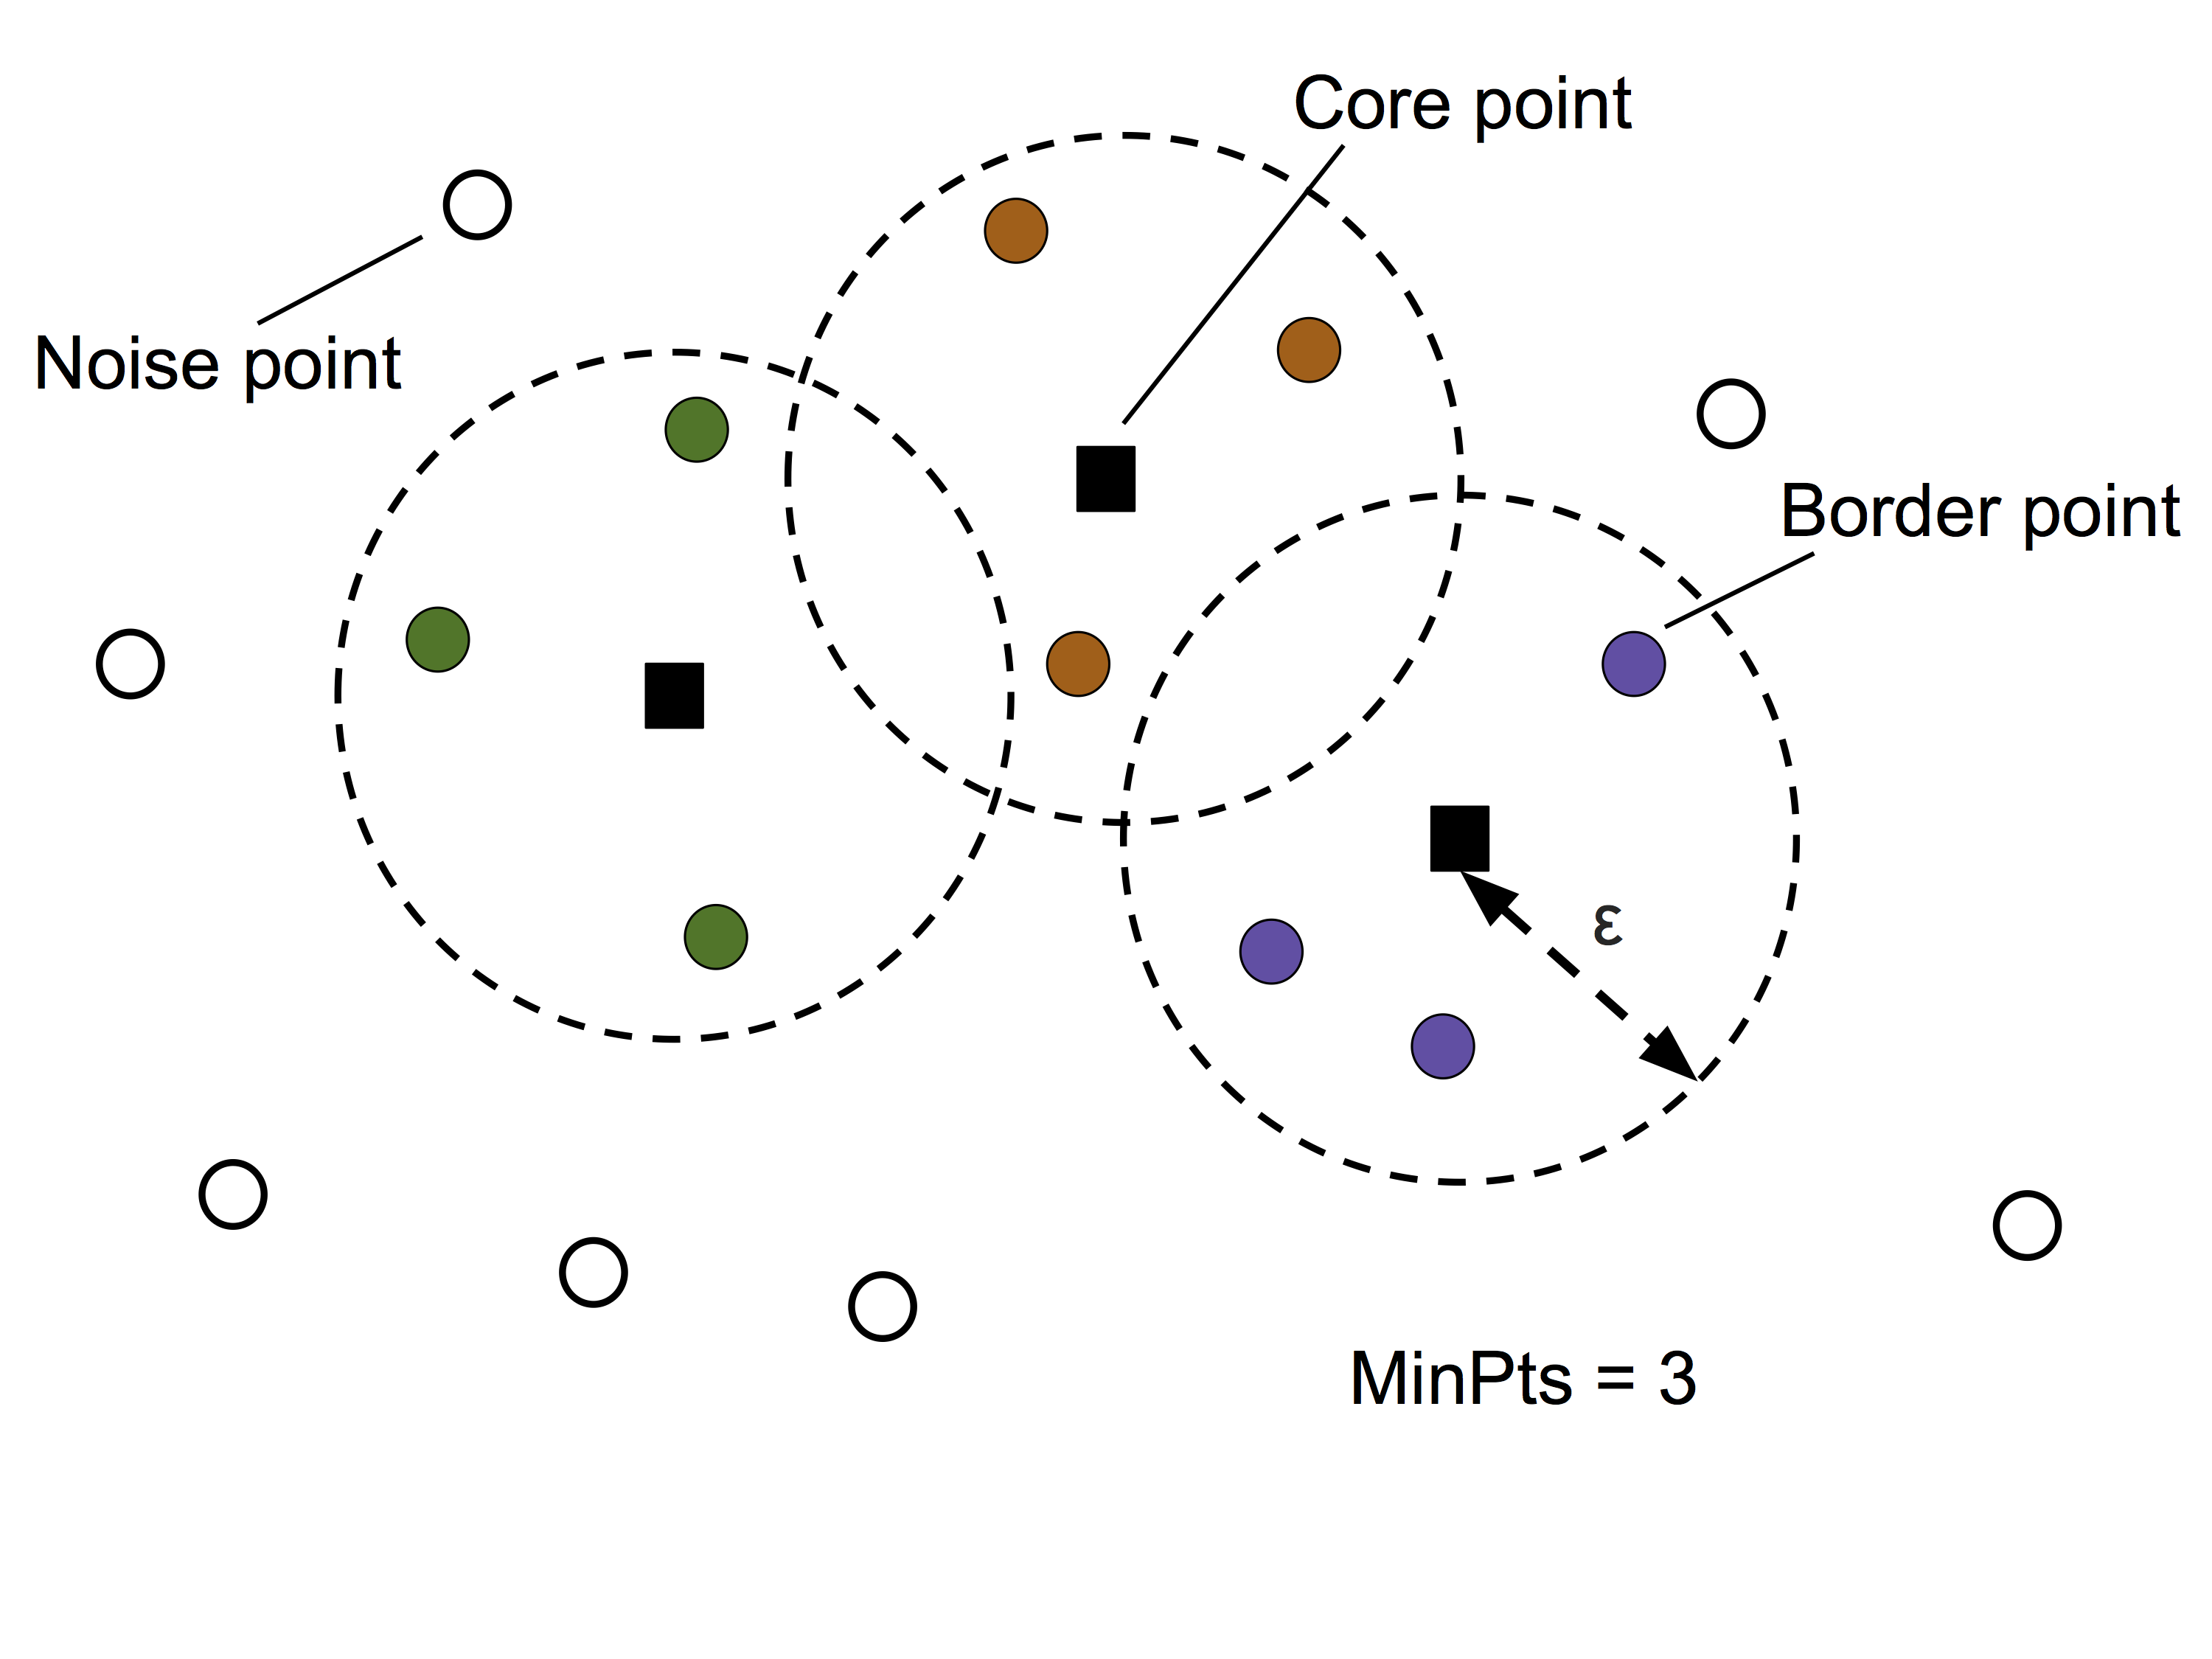

In [43]:
Image(filename='images/11_13.png', width=500) 

构建半月形数据集比较k-means聚类，层次聚类和DBSCN

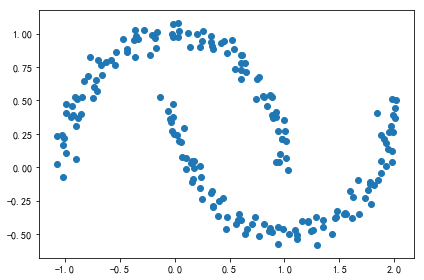

In [44]:
# 构建半月形数据集
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

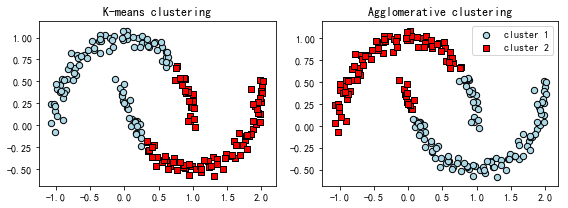

In [45]:
# 采用k-means算法进行聚类
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

# 基于凝聚的层次聚类
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
# 采用sklearn中的AgglomerativeClustering类进行基于凝聚的层次聚类

y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
# plt.savefig('images/11_15.png', dpi=300)
plt.show()

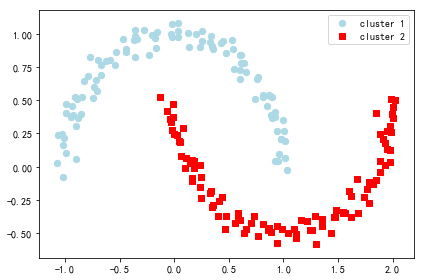

In [46]:
# 采用DBSCAN算法进行聚类
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('./figures/moons_dbscan.png', dpi=300)
plt.show()

**DBSCN算法的若干概念：**  
- 对象的$\varepsilon$-领域：给定对象在半径$\varepsilon$内的区域  
- 核心对象：对于给定的数目m，如果一个对象的ε-邻域至少包含m个对象，则称该对象为核心对象。
- 直接密度可达：给定一个对象集合D，如果p是在q的ε-邻域内，而q是一个核心对象，我们说对象p从对象q出发是直接密度可达的。
- 密度可达：如果存在一个对象链p1p2…pn，p1=q，pn=p，对pi∈D，(1≤i ≤n)，pi+1是从pi关于ε和m直接密度可达的，则对象p是从对象q关于ε和m密度可达的。
- 密度相连：如果对象集合D中存在一个对象o，使得对象p和q是从o关于ε和m密度可达的，那么对象p和q是关于ε和m密度相连的。
- 簇：一个基于密度的簇是最大的密度相连对象的集合。
- 噪声：不包含在任何簇中的对象称为噪声。

**DBSCN算法流程：**  
- 如果一个点p的ε-邻域包含多于m个对象，则创建一个p作为核心对象的新簇；
- 寻找并合并核心对象直接密度可达的对象；
- 没有新点可以更新簇时，算法结束。

**注意：**  
- 每个簇至少包含一个核心对象；
- 非核心对象可以是簇的一部分，构成了簇的边缘(edge)；
- 包含过少对象的簇被认为是噪声。

一个完整的DBSCAN密度聚类代码实例：

[-1  0  1  2  3] 聚类簇的个数为： 4
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.95686275 0.42745098 0.2627451  1.        ]
 [0.99607843 0.87843137 0.54509804 1.        ]
 [0.90196078 0.96078431 0.59607843 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[-1  0  1  2  3] 聚类簇的个数为： 4
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.95686275 0.42745098 0.2627451  1.        ]
 [0.99607843 0.87843137 0.54509804 1.        ]
 [0.90196078 0.96078431 0.59607843 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[-1  0  1  2  3  4] 聚类簇的个数为： 5
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.90442138 0.3479431  0.28304498 1.        ]
 [0.9928489  0.71695502 0.4094579  1.        ]
 [0.99915417 0.97377932 0.70503652 1.        ]
 [0.81122645 0.92387543 0.61453287 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[-1  0] 聚类簇的个数为： 1
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[-1  0  1] 聚类簇的个数为： 2
[[0.61960784 0.0039215

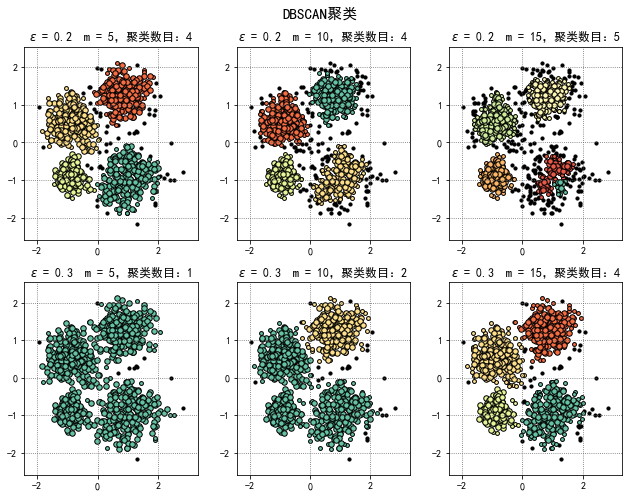

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d


if __name__ == "__main__":
    N = 1000
    centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
    data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
    data = StandardScaler().fit_transform(data)
    # 数据1的参数：(epsilon, min_sample)
    params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))
    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False

    plt.figure(figsize=(9, 7), facecolor='w')
    plt.suptitle('DBSCAN聚类', fontsize=15)

    for i in range(6):
        eps, min_samples = params[i]
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data)
        y_hat = model.labels_

        core_indices = np.zeros_like(y_hat, dtype=bool)
        core_indices[model.core_sample_indices_] = True
        # y_hat中的-1值，代表数据噪声
        y_unique = np.unique(y_hat)
        n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
        print(y_unique, '聚类簇的个数为：', n_clusters)

        # clrs = []
        # for c in np.linspace(16711680, 255, y_unique.size):
        #     clrs.append('#%06x' % c)
        plt.subplot(2, 3, i+1)
        clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size))
        print(clrs)
        for k, clr in zip(y_unique, clrs):
            cur = (y_hat == k)
            if k == -1:
                # 绘制噪声数据，显示为黑点
                plt.scatter(data[cur, 0], data[cur, 1], s=10, c='k')
                continue
            plt.scatter(data[cur, 0], data[cur, 1], s=15, c=clr, edgecolors='k')
            plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=30, c=clr, marker='o', edgecolors='k')
        x1_min, x2_min = np.min(data, axis=0)
        x1_max, x2_max = np.max(data, axis=0)
        x1_min, x1_max = expand(x1_min, x1_max)
        x2_min, x2_max = expand(x2_min, x2_max)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.plot()
        plt.grid(b=True, ls=':', color='#606060')
        plt.title(r'$\epsilon$ = %.1f  m = %d，聚类数目：%d' % (eps, min_samples, n_clusters), fontsize=12)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


[0 1 2] 聚类簇的个数为： 3
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.99607843 0.87843137 0.54509804 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[-1  0  1] 聚类簇的个数为： 2
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.99607843 0.87843137 0.54509804 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[-1  0] 聚类簇的个数为： 1
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[0] 聚类簇的个数为： 1
[[0.61960784 0.00392157 0.25882353 1.        ]]
[-1  0] 聚类簇的个数为： 1
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]
[-1  0] 聚类簇的个数为： 1
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]]


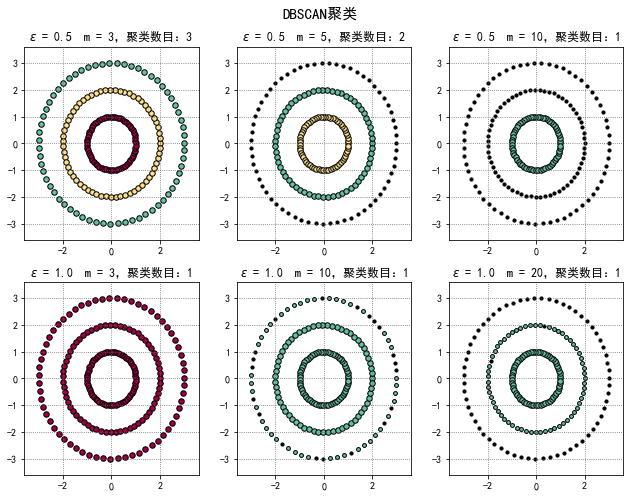

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d


if __name__ == "__main__":
    N = 1000
    centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
    data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
    data = StandardScaler().fit_transform(data)
    
    # 数据2
    t = np.arange(0, 2*np.pi, 0.1)
    data1 = np.vstack((np.cos(t), np.sin(t))).T
    data2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
    data3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
    data = np.vstack((data1, data2, data3))
    # # 数据2的参数：(epsilon, min_sample)
    params = ((0.5, 3), (0.5, 5), (0.5, 10), (1., 3), (1., 10), (1., 20))

    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False

    plt.figure(figsize=(9, 7), facecolor='w')
    plt.suptitle('DBSCAN聚类', fontsize=15)

    for i in range(6):
        eps, min_samples = params[i]
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data)
        y_hat = model.labels_

        core_indices = np.zeros_like(y_hat, dtype=bool)
        core_indices[model.core_sample_indices_] = True

        y_unique = np.unique(y_hat)
        n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
        print(y_unique, '聚类簇的个数为：', n_clusters)

        # clrs = []
        # for c in np.linspace(16711680, 255, y_unique.size):
        #     clrs.append('#%06x' % c)
        plt.subplot(2, 3, i+1)
        clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size))
        print(clrs)
        for k, clr in zip(y_unique, clrs):
            cur = (y_hat == k)
            if k == -1:
                plt.scatter(data[cur, 0], data[cur, 1], s=10, c='k')
                continue
            plt.scatter(data[cur, 0], data[cur, 1], s=15, c=clr, edgecolors='k')
            plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=30, c=clr, marker='o', edgecolors='k')
        x1_min, x2_min = np.min(data, axis=0)
        x1_max, x2_max = np.max(data, axis=0)
        x1_min, x1_max = expand(x1_min, x1_max)
        x2_min, x2_max = expand(x2_min, x2_max)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.plot()
        plt.grid(b=True, ls=':', color='#606060')
        plt.title(r'$\epsilon$ = %.1f  m = %d，聚类数目：%d' % (eps, min_samples, n_clusters), fontsize=12)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


一般来说，参数epsilon大的时候，m值也要跟着变大。因为epsilon变大，意味着半径变大

DBSCAN可以对任意形状的数据进行聚类。而k-means算法和基于全连接的层次聚类算法无法将两个簇分开。但同时，DBSCAN也存在一些缺点。对于一个给定样本数量的训练数据集，随着数据集中特征数量的增加，维度灾难的负面影响会随之递增。在使用欧几里得距离度量时，维度灾难问题尤为突出。此外，为了能够生成更优的聚类结果，需要对DBSCAN中的两个超参（MintPts和）进行优化，如果数据集中的密度差异相对较大，则找到合适的MintPts和的组合较为困难。

## 11.4 其他聚类算法

### 11.4.1 AP聚类

AP算法的基本思想是将全部样本看作网络的节点，然后通过网络中各条边的消息传递计算出各样本的聚类中心。聚类过程中，共有两种消息在各节点间传递，分别是**吸引度**( responsibility：R(i,k)描述数据对象k适合作为数据对象i的聚类中心的程度)和**归属度**(availability：A(i,k)描述数据对象i选择数据对象k作为其聚类中心的适合程度) 。AP算法通过迭代过程**不断更新每一个点的吸引度和归属度值**，直到产生m个高质量的Exemplar（类似于质心），同时将其余的数据点分配到相应的聚类中。

Preference： -5.299145530339143
1.0
p = 1.0 -5.299145530339143 聚类簇的个数为： 16
1.375
p = 1.4 -7.286325104216321 聚类簇的个数为： 12
1.75
p = 1.8 -9.273504678093499 聚类簇的个数为： 11
2.125
p = 2.1 -11.260684251970678 聚类簇的个数为： 10
2.5
p = 2.5 -13.247863825847856 聚类簇的个数为： 9
2.875
p = 2.9 -15.235043399725035 聚类簇的个数为： 8
3.25
p = 3.2 -17.222222973602214 聚类簇的个数为： 55
3.625
p = 3.6 -19.209402547479392 聚类簇的个数为： 107
4.0
p = 4.0 -21.19658212135657 聚类簇的个数为： 7


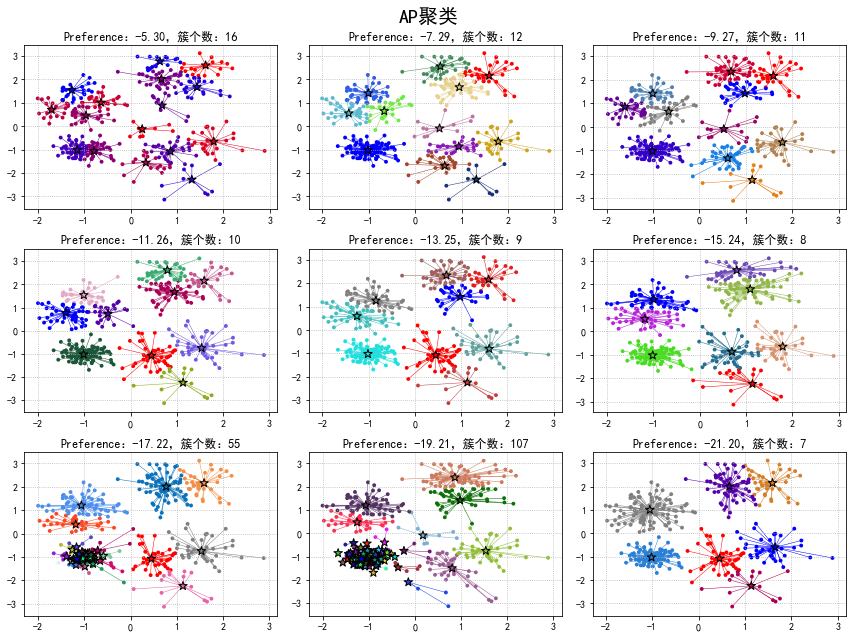

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import euclidean_distances


if __name__ == "__main__":
    N = 400
    centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
    data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
    # 使用欧式距离（欧几里得距离）
    m = euclidean_distances(data, squared=True)
    preference = -np.median(m)
    print('Preference：', preference)

    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(12, 9), facecolor='w')
    for i, mul in enumerate(np.linspace(1, 4, 9)):
        print(mul)
        p = mul * preference
        model = AffinityPropagation(affinity='euclidean', preference=p)
        af = model.fit(data)
        center_indices = af.cluster_centers_indices_
        n_clusters = len(center_indices)
        print(('p = %.1f' % mul), p, '聚类簇的个数为：', n_clusters)
        y_hat = af.labels_

        plt.subplot(3, 3, i+1)
        plt.title('Preference：%.2f，簇个数：%d' % (p, n_clusters))
        clrs = []
        for c in np.linspace(16711680, 255, n_clusters, dtype=int):
            clrs.append('#%06x' % c)
        # clrs = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
        for k, clr in enumerate(clrs):
            cur = (y_hat == k)
            # 绘制中心点周边的距离
            plt.scatter(data[cur, 0], data[cur, 1], s=15, c=clr, edgecolors='none')
            center = data[center_indices[k]]
            for x in data[cur]:
                 # 将中心点与周边的圆点连线
                plt.plot([x[0], center[0]], [x[1], center[1]], color=clr, lw=0.5, zorder=1)
        # 绘制中心点，用星表示
        plt.scatter(data[center_indices, 0], data[center_indices, 1], s=80, c=clrs, marker='*', edgecolors='k', zorder=2)
        plt.grid(b=True, ls=':')
    plt.tight_layout()
    plt.suptitle('AP聚类', fontsize=20)
    plt.subplots_adjust(top=0.92)
    plt.show()


### 11.4.2 MeanShift聚类

Mean: 均值，Shift: 变换  
Mean shift 算法是基于核密度估计的爬山算法，可用于聚类、图像分割、跟踪等  
**基本思想：**Mean shift将特征空间视为先验概率密度函数，那么输入就被视为是一组满足某种概率分布的样本点，这样一来，特征空间中数据最密集的地方，对应于概率密度最大的地方，且概率密度的质心就可以被视为是概率密度函数的局部最优值，也就是要求的聚类中心。对于每一个样本点，**计算以它为中心的某个范围内所有样本点的均值，作为新的中心**，移动直至收敛。这样每一轮迭代，中心都会向数据更密集的地方移动。

5.316611296915807
带宽： 0.1 0.5316611296915806 聚类簇的个数为： 7
带宽： 0.2 1.0633222593831613 聚类簇的个数为： 4
带宽： 0.30000000000000004 1.5949833890747422 聚类簇的个数为： 3
带宽： 0.4 2.1266445187663225 聚类簇的个数为： 1


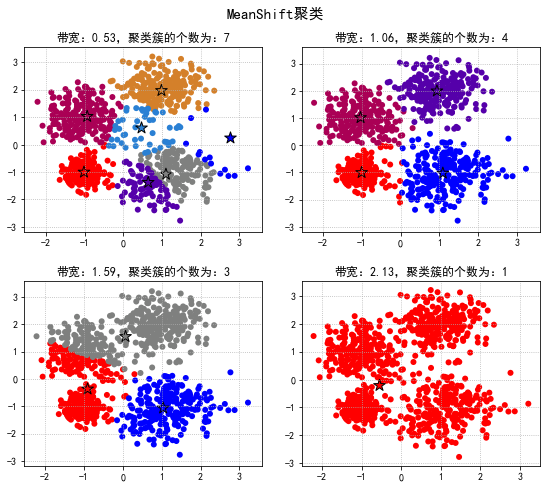

In [50]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import MeanShift
from sklearn.metrics import euclidean_distances


if __name__ == "__main__":
    N = 1000
    centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
    data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)

    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 7), facecolor='w')
    m = euclidean_distances(data, squared=True)
    bw = np.median(m)
    print(bw)
    for i, mul in enumerate(np.linspace(0.1, 0.4, 4)):
        band_width = mul * bw
        model = MeanShift(bin_seeding=True, bandwidth=band_width)
        ms = model.fit(data)
        centers = ms.cluster_centers_
        y_hat = ms.labels_
        n_clusters = np.unique(y_hat).size
        print('带宽：', mul, band_width, '聚类簇的个数为：', n_clusters)

        plt.subplot(2, 2, i+1)
        plt.title('带宽：%.2f，聚类簇的个数为：%d' % (band_width, n_clusters))
        clrs = []
        for c in np.linspace(16711680, 255, n_clusters, dtype=int):
            clrs.append('#%06x' % c)
        # clrs = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
        for k, clr in enumerate(clrs):
            cur = (y_hat == k)
            plt.scatter(data[cur, 0], data[cur, 1], c=clr, edgecolors='none')
        plt.scatter(centers[:, 0], centers[:, 1], s=150, c=clrs, marker='*', edgecolors='k')
        plt.grid(b=True, ls=':')
    plt.tight_layout(2)
    plt.suptitle('MeanShift聚类', fontsize=15)
    plt.subplots_adjust(top=0.9)
    plt.show()


### 11.4.3 HDBSCAN聚类

HDBSCAN是密度聚类与层次聚类统一的一个聚类算法。  
HDBSCAN通过结合层次聚类的特别来改善DBSCAN的不稳定性，HDBSCAN聚类过程为一下2个步骤：  
1. 生成原始聚簇。确定核心点，生成原始聚簇并有效地识别噪声点。
2. 合并原始聚簇。在此阶段使用层次聚类的思想对原始聚簇进行合并，降低了聚类结果对输入参数的敏感性。由于该方法不需要对每个对象进行测试和判断，同时也降低了时间复杂度。

[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3] 聚类簇的个数为： 4


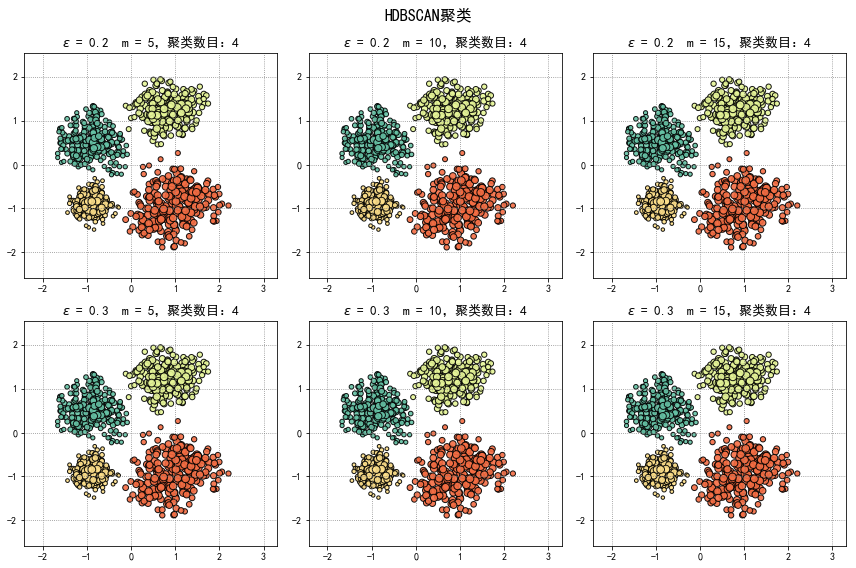

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import hdbscan
# hdbscan并不存在于scikit-learn里面，需要自行安装相关的组件包

def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d


if __name__ == "__main__":
    N = 1000
    centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
    data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
    data = StandardScaler().fit_transform(data)
    # 数据1的参数：(epsilon, min_sample)
    params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))

    # 数据2
    # t = np.arange(0, 2*np.pi, 0.1)
    # data1 = np.vstack((np.cos(t), np.sin(t))).T
    # data2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
    # data3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
    # data = np.vstack((data1, data2, data3))
    # # # 数据2的参数：(epsilon, min_sample)
    # params = ((0.5, 3), (0.5, 5), (0.5, 10), (1., 3), (1., 10), (1., 20))

    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False

    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle('HDBSCAN聚类', fontsize=16)

    for i in range(6):
        eps, min_samples = params[i]
        model = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=10)
        model.fit(data)
        y_hat = model.labels_

        core_indices = np.zeros_like(y_hat, dtype=bool)
        core_indices[y_hat != -1] = True

        y_unique = np.unique(y_hat)
        n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
        print(y_unique, '聚类簇的个数为：', n_clusters)

        # clrs = []
        # for c in np.linspace(16711680, 255, y_unique.size):
        #     clrs.append('#%06x' % c)
        plt.subplot(2, 3, i+1)
        clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size))
        for k, clr in zip(y_unique, clrs):
            cur = (y_hat == k)
            # if k == -1:
            #     plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
            #     continue

            plt.scatter(data[cur, 0], data[cur, 1], s=60*model.probabilities_[cur], marker='o', c=clr, edgecolors='k', alpha=0.9)
            #plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o', edgecolors='k')
        x1_min, x2_min = np.min(data, axis=0)
        x1_max, x2_max = np.max(data, axis=0)
        x1_min, x1_max = expand(x1_min, x1_max)
        x2_min, x2_max = expand(x2_min, x2_max)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(b=True, ls=':', color='#808080')
        plt.title(r'$\epsilon$ = %.1f  m = %d，聚类数目：%d' % (eps, min_samples, n_clusters), fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


### 11.4.4谱聚类

谱聚类同样可以如密度聚类处理不规则数据分布，如圆环形数据。  
算法集位于: sklearn.cluster.SpectralClustering  
谱聚类是从图论中演化出来的算法。  
**算法思想**：把所有的数据看做空间中的点，这些点之间可以用边连接起来。距离较远的两个点之间的边权重值较低，而距离较近的两个点之间的边权重值较高，通过对所有数据点组成的图进行**切图**，让切图后**不同的子图间边权重和尽可能的低，而子图内的边权重和尽可能的高**，从而达到聚类的目的。

0.01
0.025118864315095794
0.06309573444801933
0.15848931924611143
0.3981071705534973
1.0


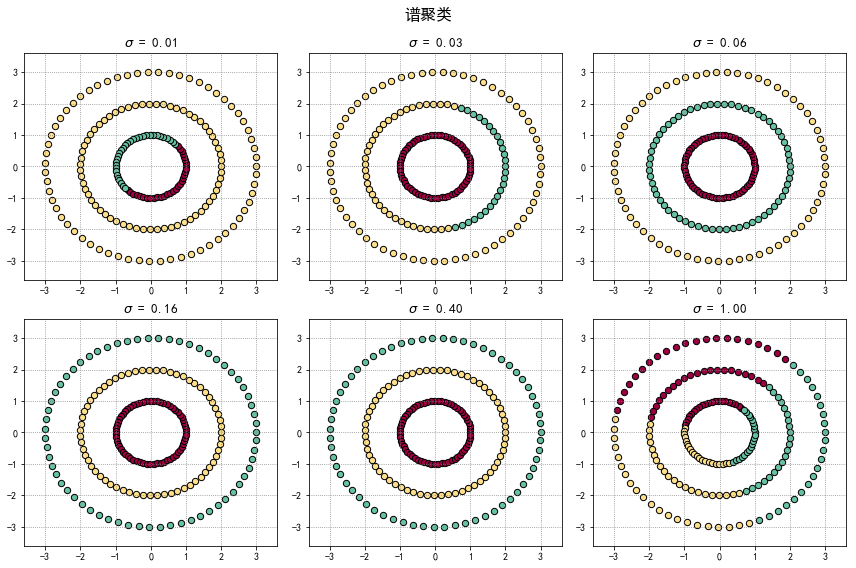

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import SpectralClustering
from sklearn.metrics import euclidean_distances


def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d


if __name__ == "__main__":
    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False

    t = np.arange(0, 2*np.pi, 0.1)
    data1 = np.vstack((np.cos(t), np.sin(t))).T
    data2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
    data3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
    data = np.vstack((data1, data2, data3))

    n_clusters = 3
    m = euclidean_distances(data, squared=True)

    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle('谱聚类', fontsize=16)
    clrs = plt.cm.Spectral(np.linspace(0, 0.8, n_clusters))
    for i, s in enumerate(np.logspace(-2, 0, 6)):
        print(s)
        af = np.exp(-m ** 2 / (s ** 2)) + 1e-6
        model = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=1)
        y_hat = model.fit_predict(af)
        plt.subplot(2, 3, i+1)
        for k, clr in enumerate(clrs):
            cur = (y_hat == k)
            plt.scatter(data[cur, 0], data[cur, 1], s=40, c=clr, edgecolors='k')
        x1_min, x2_min = np.min(data, axis=0)
        x1_max, x2_max = np.max(data, axis=0)
        x1_min, x1_max = expand(x1_min, x1_max)
        x2_min, x2_max = expand(x2_min, x2_max)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(b=True, ls=':', color='#808080')
        plt.title(r'$\sigma$ = %.2f' % s, fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


# <font color=red> Summary</font>

1 学习基于原型的k-means聚类算法。使用数据内在的有用的性能指标（肘方法、轮廓分析）来对聚类是质量进行量化评定<br>
2 学习凝聚层次聚类。层次聚类不需要事先指定簇的数量，而且聚类的结果可以通过树状图进行可视化展示，这有助于分析和解释聚类结果。<br>
3 DBSCAN,基于样本的密度对其进行分组，并且她可以处理异常值以及识别非球形簇。<br>

总结以上三种算法：k-means算法基于指定数量的簇中心，将样本划分为球形簇。层次聚类不需要事先指定簇的数量，且聚类的结果可以通过树状图进行可视化展示。而基于密度空间的聚类算法则是基于样本的密度对其进行分组，且可以处理异常值以及识别非球形簇。